# DSMCER Notebook 6 - Linear Modeling, Bias, and Variance

1. Single Linear Regression
    1. Residual Sum of Squares
    2. _Exercise_: fit a linear regressor
    3. _Poll_: are we there yet?
2. Classification from continuous output
3. Error/Accuracy Zoo
4. Variance
    1. _Poll_: Which model is better and why?
    2. _Exercise_: effect of data samples on model
    3. Estimating variance
5. Bias
6. Bias Variance Tradeoff
    1. _Exercise_: Find the balance
7. Multiple Linear Regression (MLR)
    1. A linear regression with two features
    2. Parity plot
8. Model Regularization
    1. _Poll_: How to combat high variance?
    2. _Poll_: Is the effect of sampling different for each feature?
    3. Penalize large slopes
    4. _Exercise_: compare the variance of a ridge regressor

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import sklearn.linear_model
import sklearn.neighbors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('talk')

import warnings
warnings.filterwarnings("ignore")

***
***

## 1. Single Linear Regression

<font size=5><center>Recall in SML, our goal is to __make an estimate of $f(X)$ so that we can predict $y$__ without having to measure it!

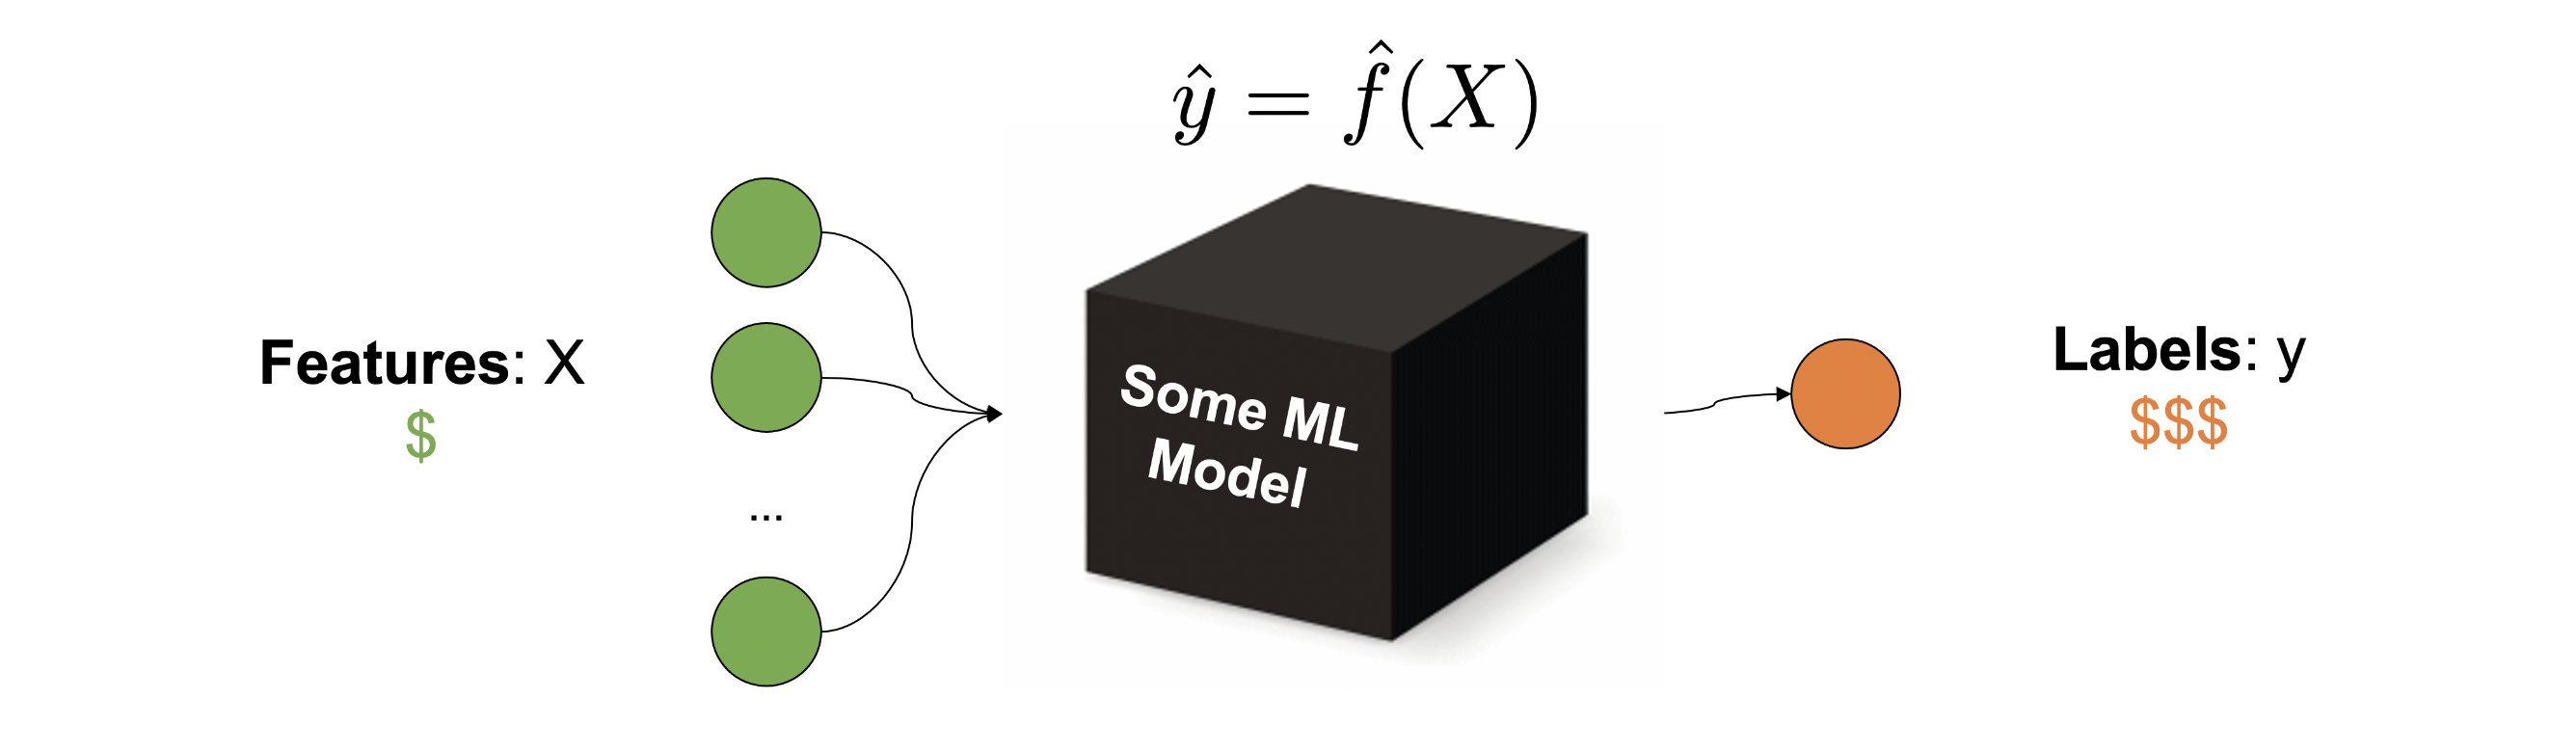

***
<font size=5><center>We can compute metrics about the model performance on any dataset with labels, but __the metrics we can use depend on the target data type__:

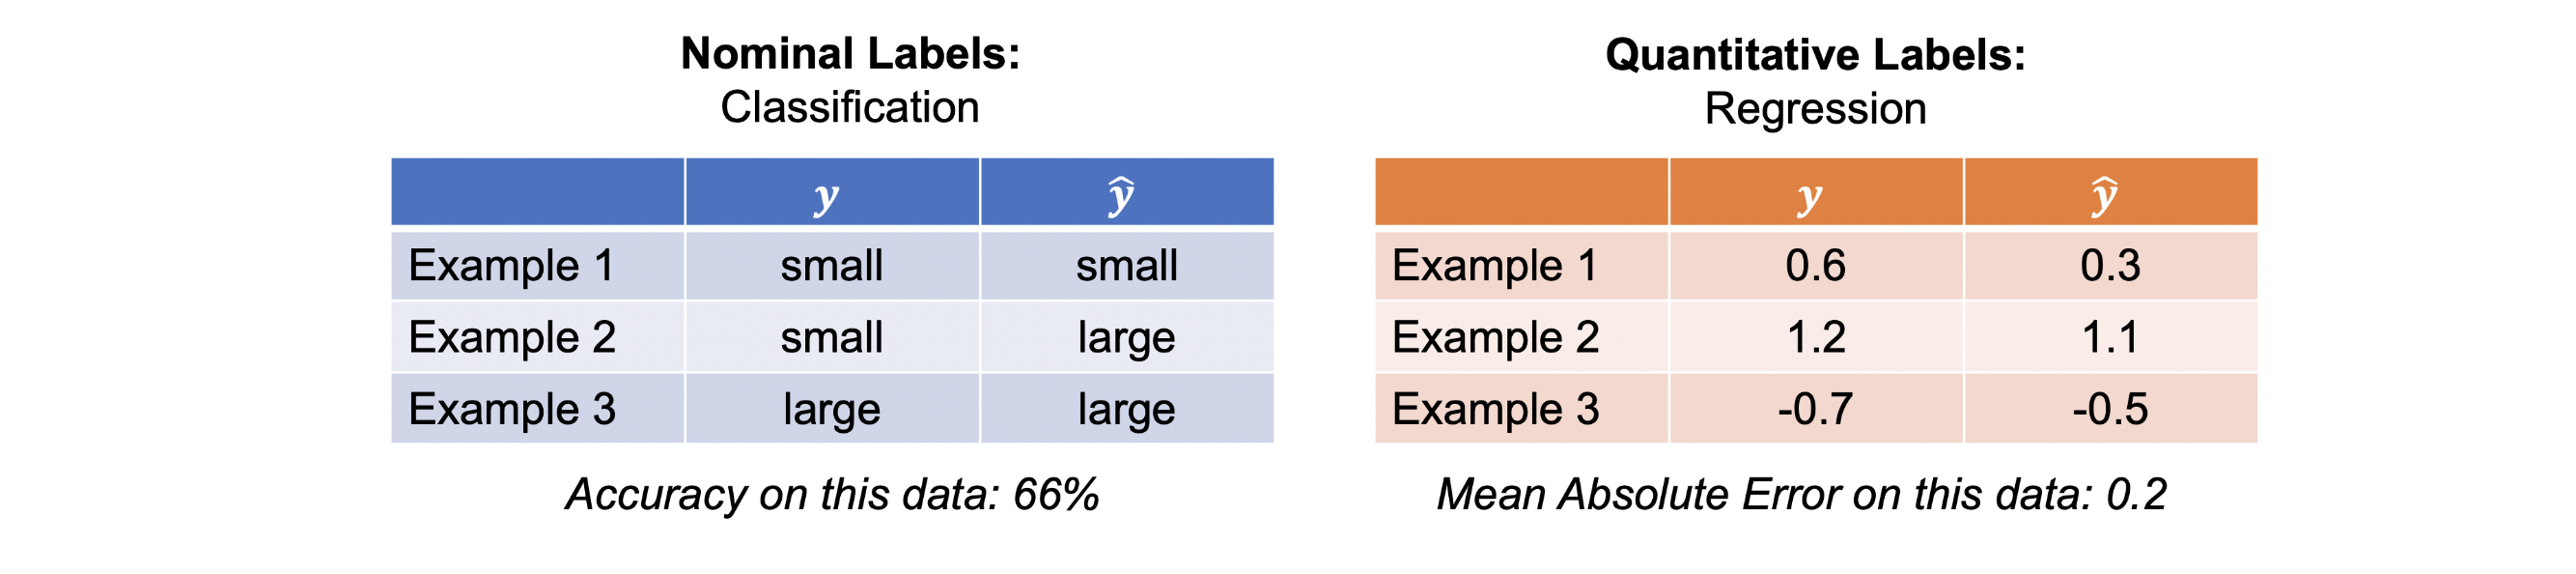

<font size=5><center>__If our target is continuous, it is a regression task, where as if they are nominal, it is a classification task__.

***

<font size=5><center>Recall that we seek to estimate $f$ to minimize "error":

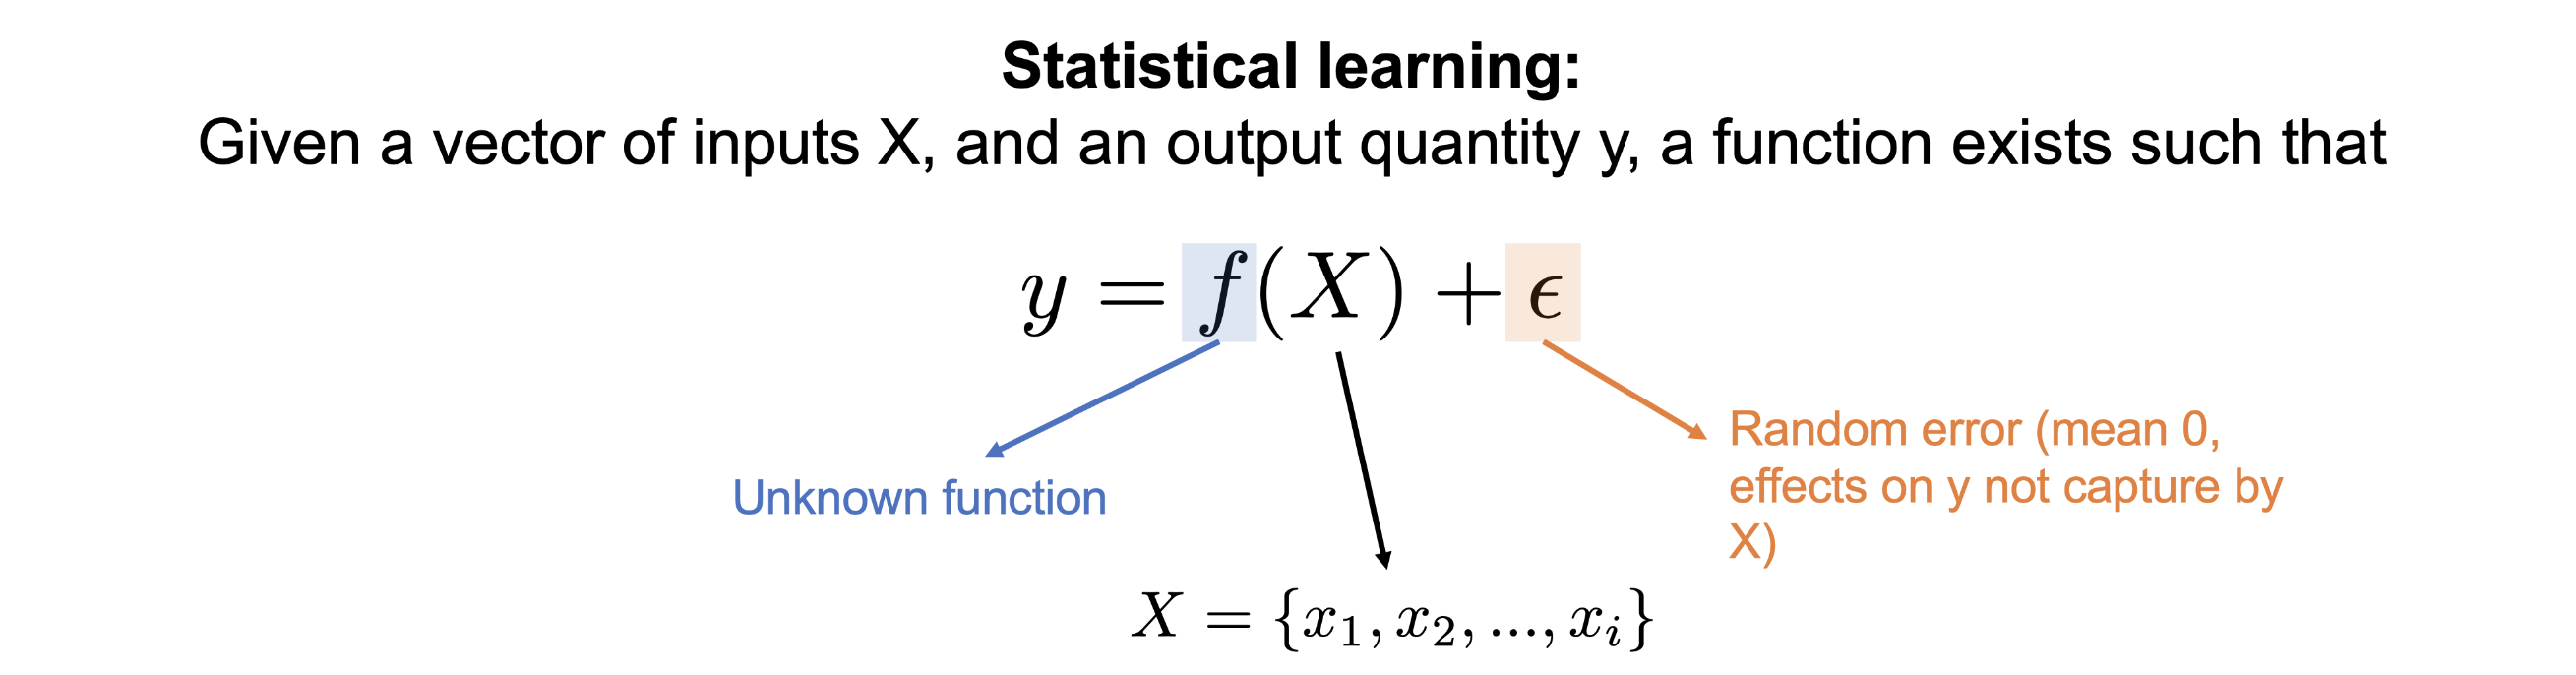

<font size=5><center>The sqaured error of the estimator $\hat{f}$ can be decomposed into two parts:

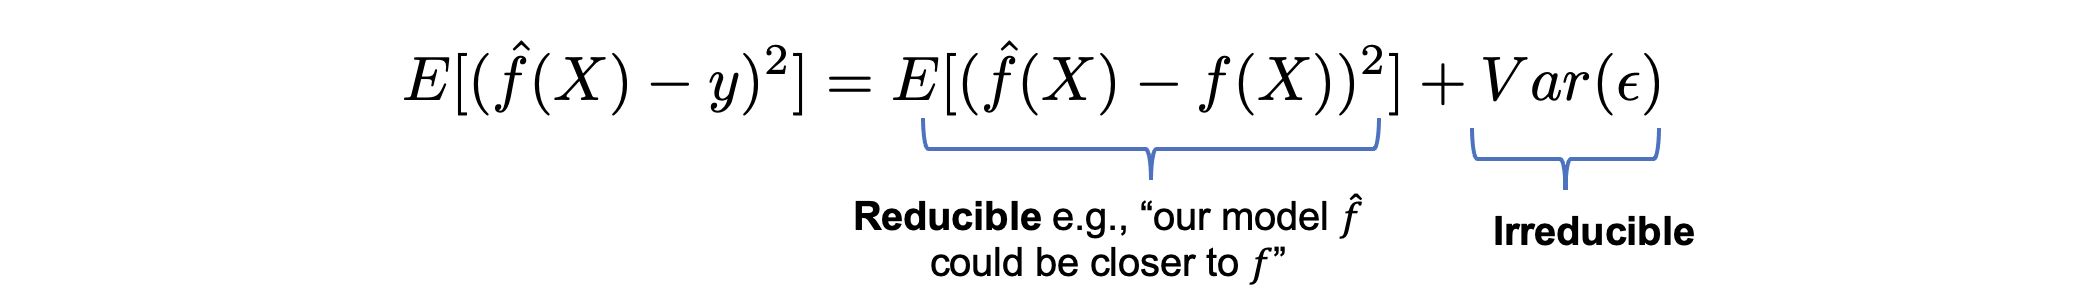

<font size=4>We do not have access to the left term __because we do not have the population, we only have a dataset (sample)__. Thus when we compute squared error for many examples in a dataset, __we are taking many observations of the left hand side__. 

<font size=5><center>The model prediction error we observe is effected __both__ by the noise in the data __and how well we capture the true relationship between $X$ and $y$__. We can only improve the second one.

***

### B. Least squares estimate

<font size=5><center>A simple linear regressor can be used in regression tasks when there is a single feature, and takes the following form:

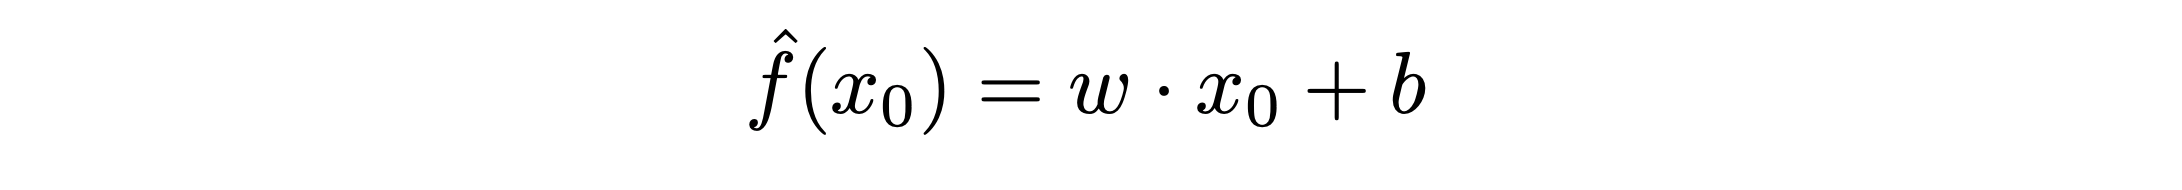

<font size=5><center>Where $x_0$ is our single feature, $w$ is the slope, and $b$ is the intercept. In ML the slope  is general called the "weight" and the intercept called the "bias".

***

<font size=5><center>__Remember how an ML model is made up of parameters__?

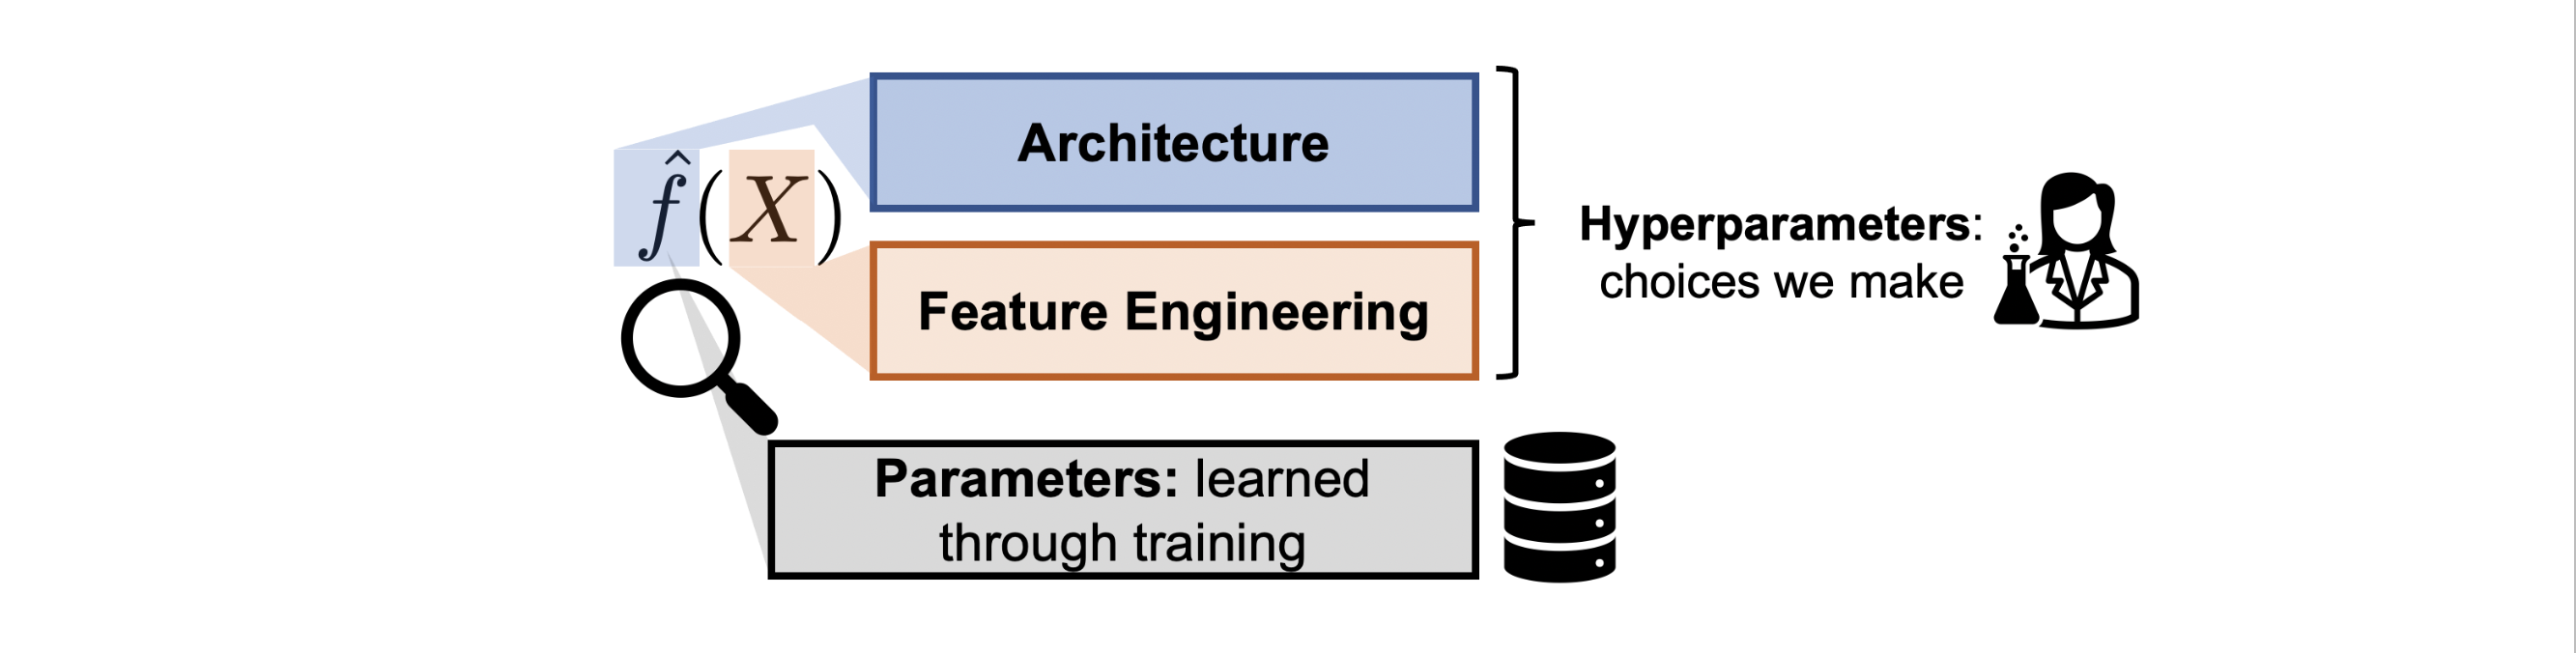

<font size=5><center>$w$ and $b$ are both parameters of the linear regressor - __we don't chose them, they are determined by fitting data.__

***

<font size=5><center>We want our parameters to be chosen such that the prediction error is minimized:

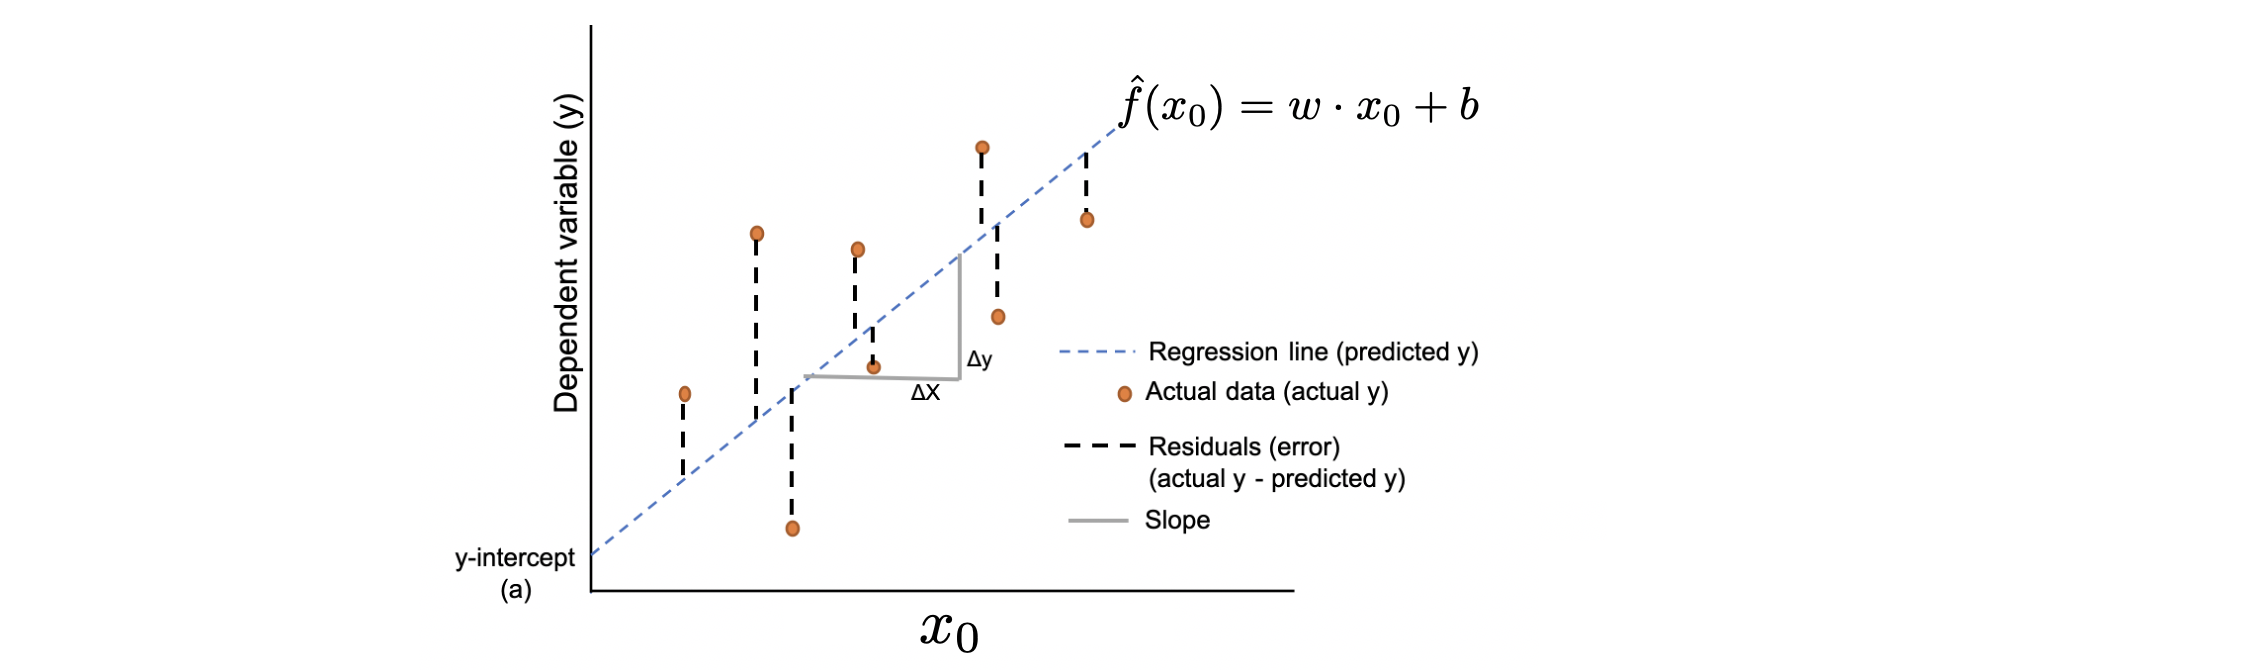

https://www.reneshbedre.com/blog/linear-regression.html

***

<font size=5><center>Linear regressors have __analytical best parameters given data__ that minimize the square error. This is not always true.

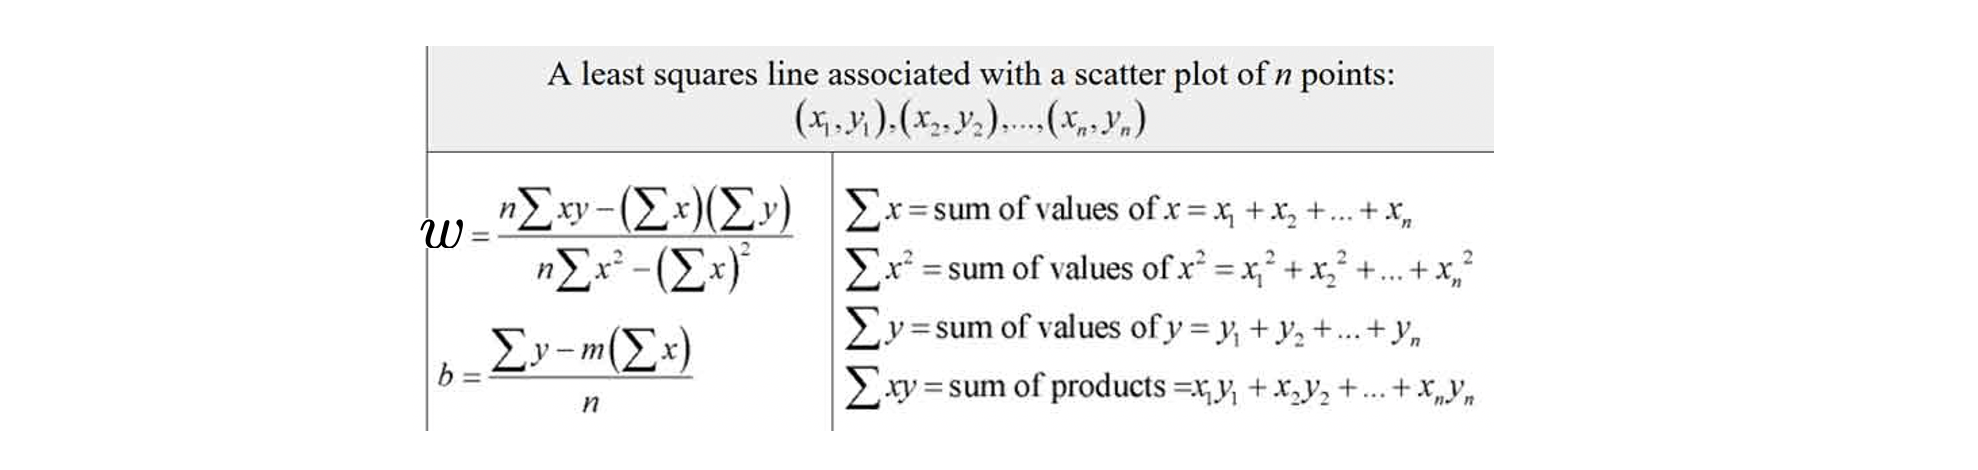

https://giasutamtaiduc.com/line-of-best-fit-formula.html

***

<font size=5><center>Let's use the HCEPDB data: JSC vs E Homo alpha

In [2]:
# load the data by downloading it
df = pd.read_csv('http://faculty.washington.edu/dacb/HCEPDB_moldata.zip').sample(500, random_state=200) # small dataset to make this easier to handle

<AxesSubplot:xlabel='jsc', ylabel='e_lumo_alpha'>

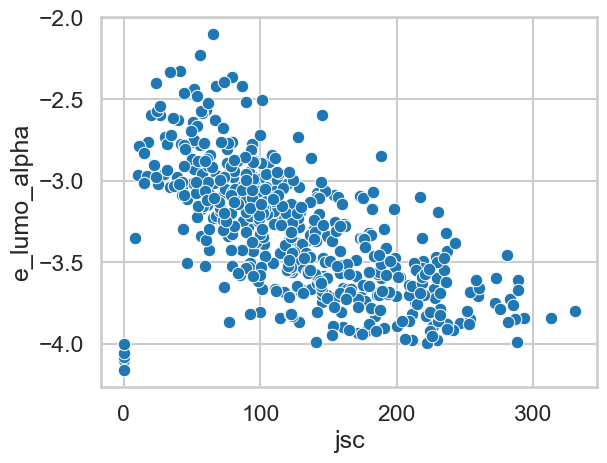

In [3]:
sns.scatterplot(df, x='jsc', y='e_lumo_alpha')

***

### C. _Exercise_: fit a linear model

<font size=4>Fit a linear model using `jsc` as $x$ and `e_lumo_alpha` as $y$ (_hint_: sklearn has a linear regressor just like it has a KNN!). Print out the values for $w$ and $b$ and plot the fit line over the data.

In [4]:
model = sklearn.linear_model.LinearRegression()

In [5]:
model.fit(df['jsc'].values.reshape(-1,1), df['e_lumo_alpha'])

LinearRegression()

In [6]:
print(f"w={model.coef_}, b={model.intercept_}")

w=[-0.00342183], b=-2.8906463635510127


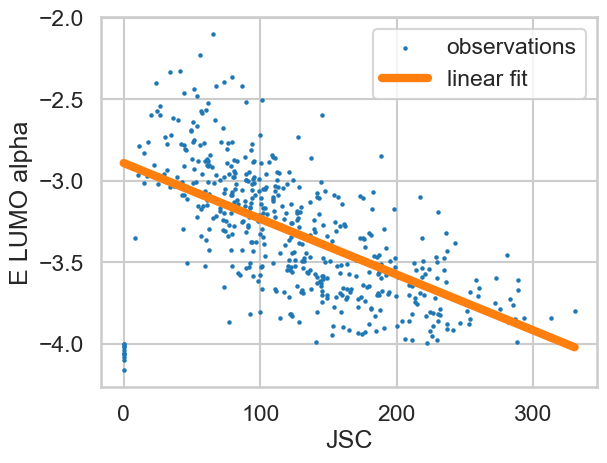

In [7]:
fig, ax = plt.subplots()
ax.scatter(df['jsc'], df['e_lumo_alpha'], label='observations', s=3)

x = np.linspace(df['jsc'].min(), df['jsc'].max()).reshape(-1,1)
ax.plot(x, model.predict(x), color='tab:orange', label='linear fit', lw=6)
ax.set_xlabel('JSC')
ax.set_ylabel('E LUMO alpha')
ax.legend()

***

### 3. _Poll_: are we there yet?

<font size=4>__Fact__: we have fit the __line__ that minimized the error on this data.
    
1. <font size=4> Have we found the best possible estimator, eg $\hat{f}(X) = f(X)$?
2. <font size=4> Have we minimized the reducable error for this dataset?

<font size=5><center>Consider the following plot:

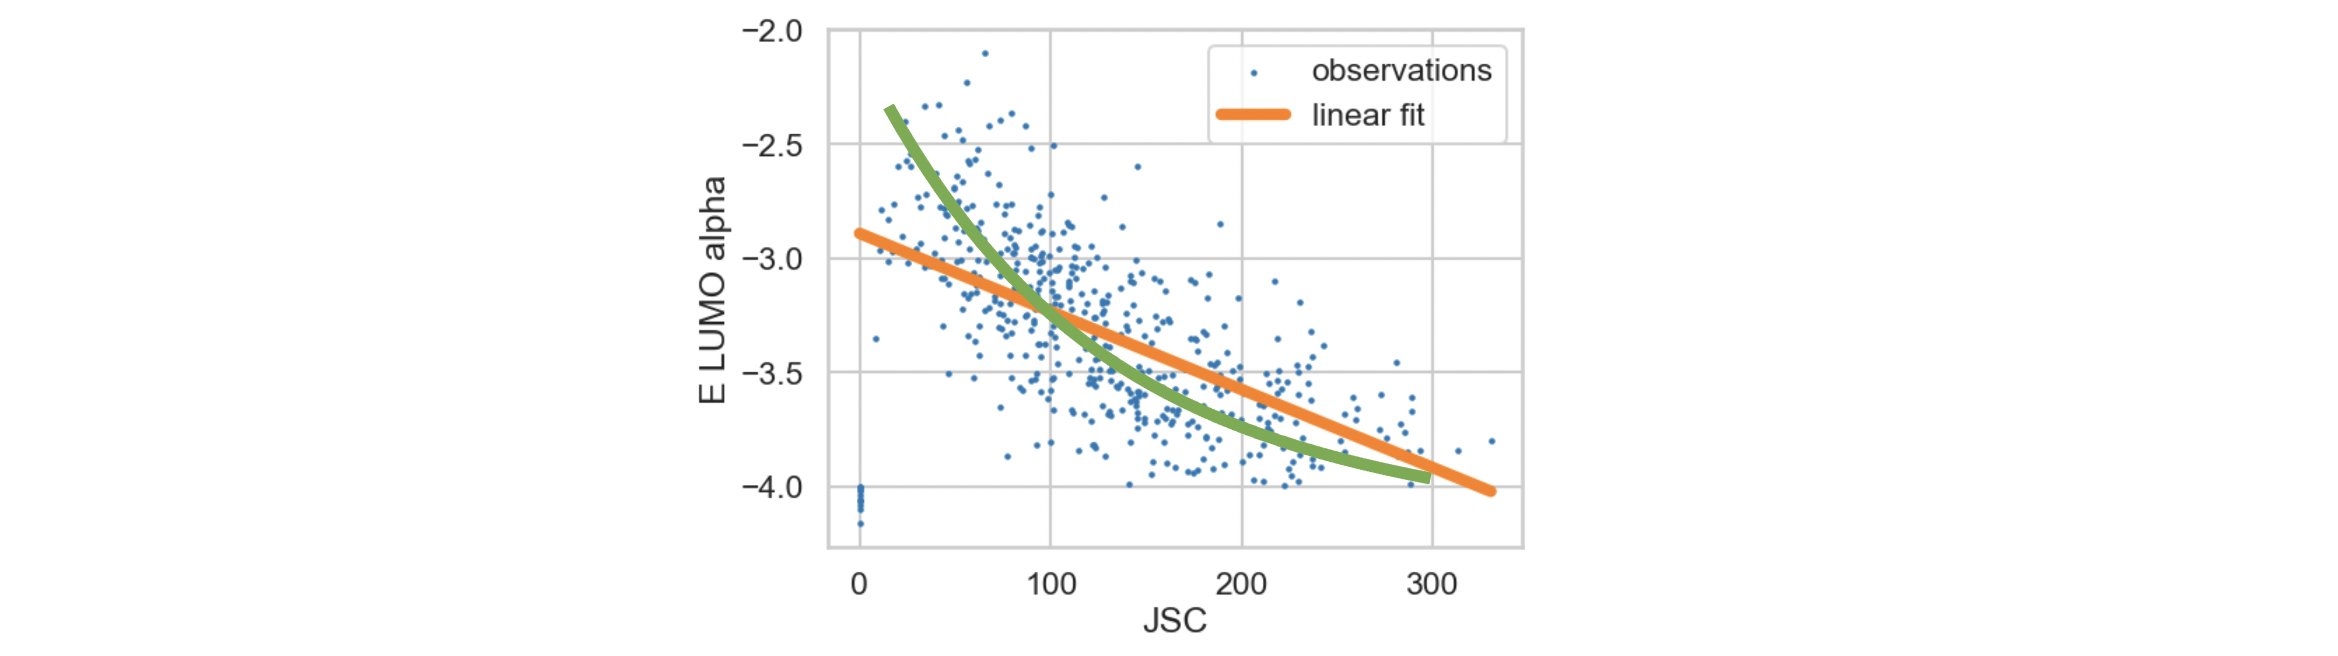


***

## 2. Classification from continuous output

<font size=5><center>It is clear how KNNs can be used for both classification and regression. __How would we use a linear regressor that outputs a continuous value to do classification?__

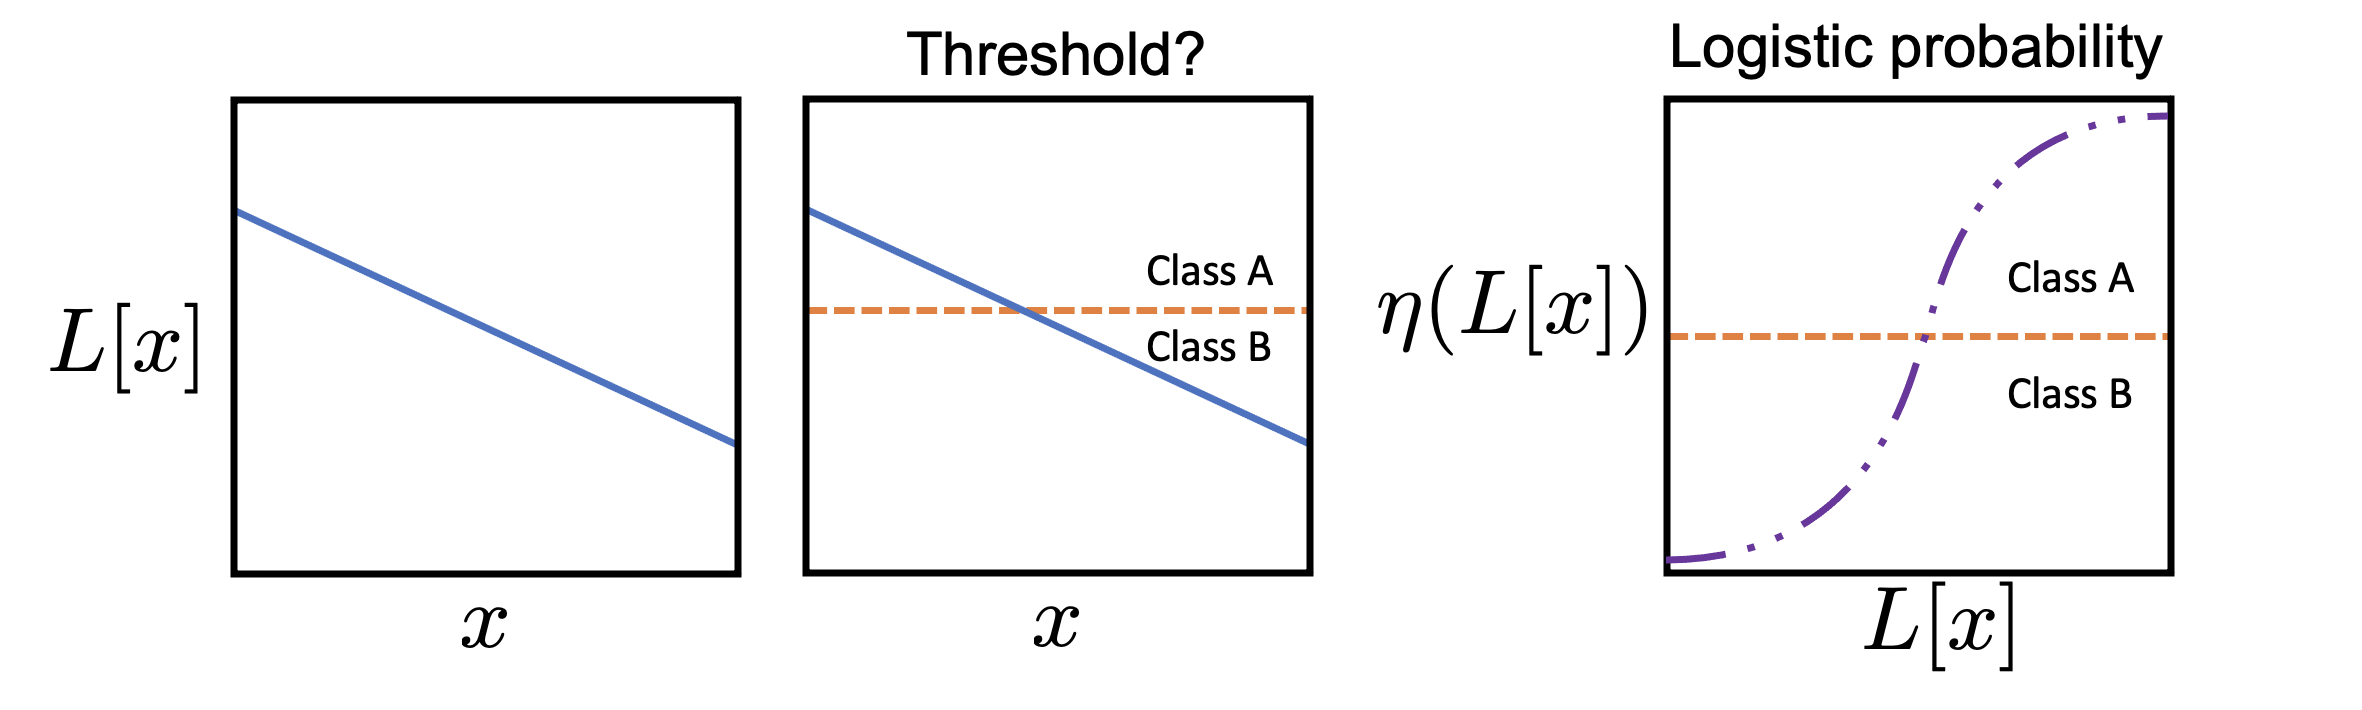

<font size=5><center>When we apply the last technique to a linear model it is called __Logistic Regression__, and no longer has analytical best parameters.

<font size=4>See that type of model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

***

## 3. Error/Accuracy Zoo

<font size=4>We have discussed accuracy and error of models broadly - __but now that we've seen both classification and regression let's list some common errors/accuracies__. Here $y$ are true labels in some dataset of size $N$ and $\hat{y}$ are the predicted labels of those same examples. $\bar{y}$ is the mean value of $y$ in the dataset.

<font size=5><center>__Regression__

#### Mean Squared Error (MSE)

<font size=4> $$MSE = \frac{1}{N}\Sigma_i^N(y_i-\hat{y}_i)^2$$

#### Mean Absolute Error (MAE)

<font size=4>More unstable than MSE but also more interpretable.

<font size=4> $$MSE = \frac{1}{N}\Sigma_i^N|y_i-\hat{y}_i|$$

#### R2 score

<font size=4>1.0 is a perfect predictor, 0.0 is guessing the mean.

<font size=4> $$R2 = 1-\frac{RSS}{TSS}$$

<font size=4>Where

<font size=4> $$RSS = \Sigma_i^N(y_i-\hat{y}_i)^2$$
    
<font size=4> $$TSS = \Sigma_i^N(\bar{y}-\hat{y}_i)^2$$

<font size=5><center>__Classification__

#### Accuracy

<font size=4> $$Acc = \frac{1}{N}\Sigma_i^N\mathbb{I}(y_i=\hat{y}_i)$$

#### Balanced Accuracy

<font size=4>Can be useful on imbalanced datasets, for example if a model was incapable of predicting `False` but was given a dataset of mostly `True` it would have a high accuracy. Here $M$ is the total number of classes and $N_j$ is the number of examples in the dataset with that class.

<font size=4> $$BA = \frac{1}{M}\Sigma_j^M\bigg[\frac{1}{N_j}\Sigma_i^{N_j}\mathbb{I}(y_i=\hat{y}_i)\bigg]$$

#### Class Rates
<font size=4>When a classification model is binary eg. two possible classes, we often refer to the following, which each represent a box in the "Confusion Matrix" seen earlier:
    
- <font size=4> True Positives ($TP$): number of predicted positives that are indeed positive
- <font size=4> False Positives ($FP$): number of predicted positives that where actually negative
- <font size=4> True Negatives ($TN$) and False Negative ($FN$): analagous definitions to above
    
<font size=4>These allow us to study how well the model does on a per class basis - __it is rarely true that a model is equally good at all classes__:
    
- <font size=4> True Positive Rate, also called sensitivity, also called recall: $TPR=\frac{TP}{TP+FN}$
- <font size=4> Precision - how many of predictions are accurate: $Prec=\frac{TP}{TP+FP}$
- <font size=4> True Negative Rate, also called specificity: $TNR=\frac{TN}{TN+FP}$

#### Log loss
<font size=4>Here $\hat{p}(y_i)$ is the output of a logistic model - this number represents the model's "probability" of being `True`. This is a useful metric because if a model outputs 0.45 for an example, it selects the `False` class, but it is much more uncertain than if the output was 0.1. This metric compares the true values to the probability of selecting that value.

<font size=4> $$LL = -\frac{1}{N}\Sigma_i^N\bigg[y_i\ln{(\hat{p}(y_i))}+(1-y_i)\ln{(1-\hat{p}(y_i))}\bigg]$$

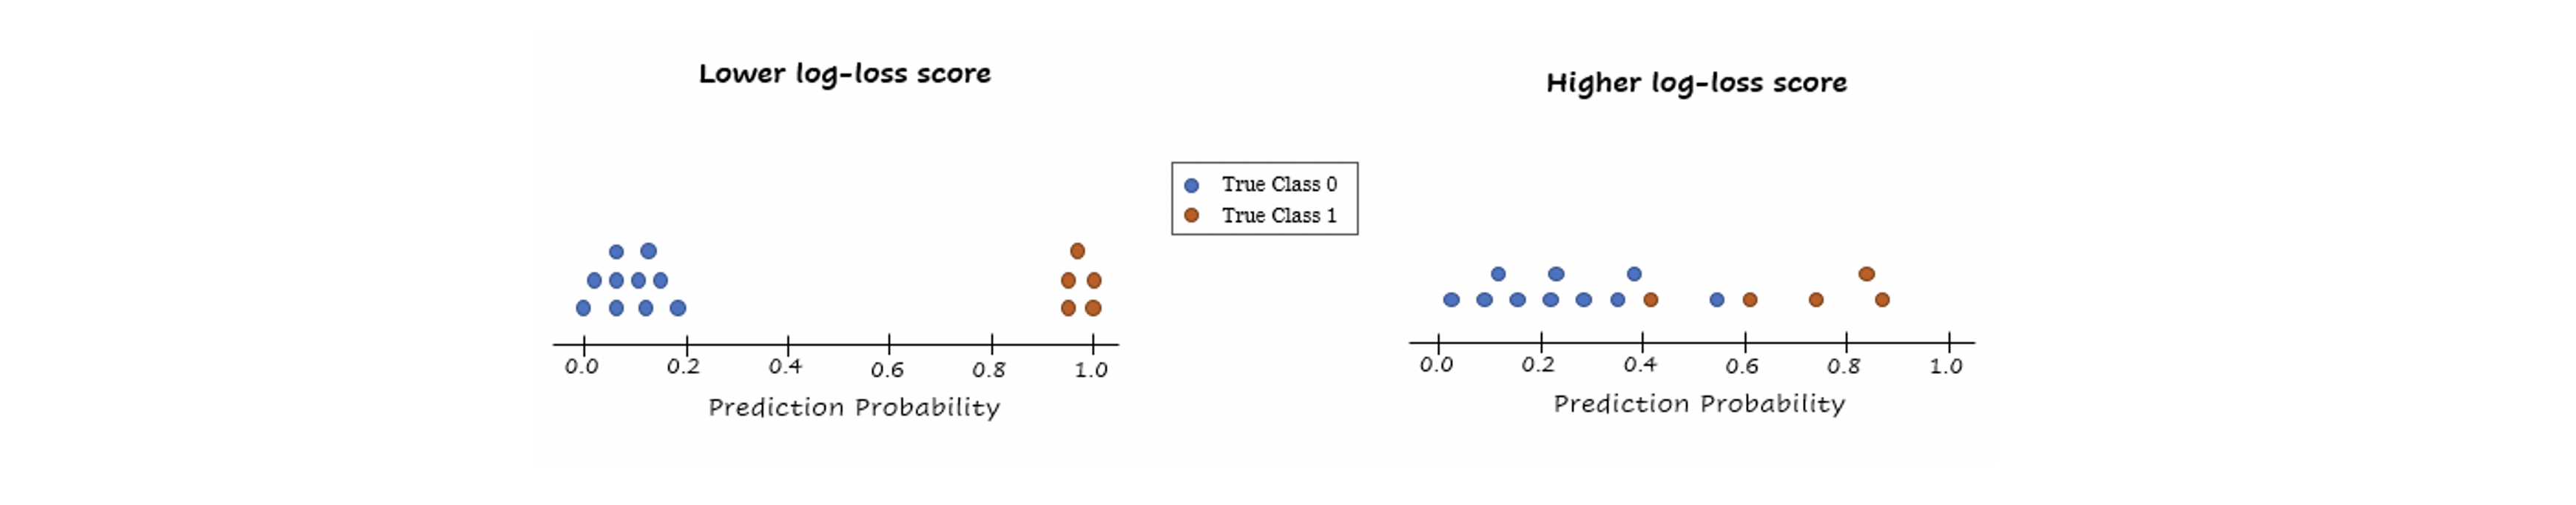

https://towardsdatascience.com/intuition-behind-log-loss-score-4e0c9979680a

## 4. Variance

<font size=5><center> Consider the plot from earlier, where I propsed there was a better model than the linear model. __Couldn't we get even better than that by being very precise with the model?__

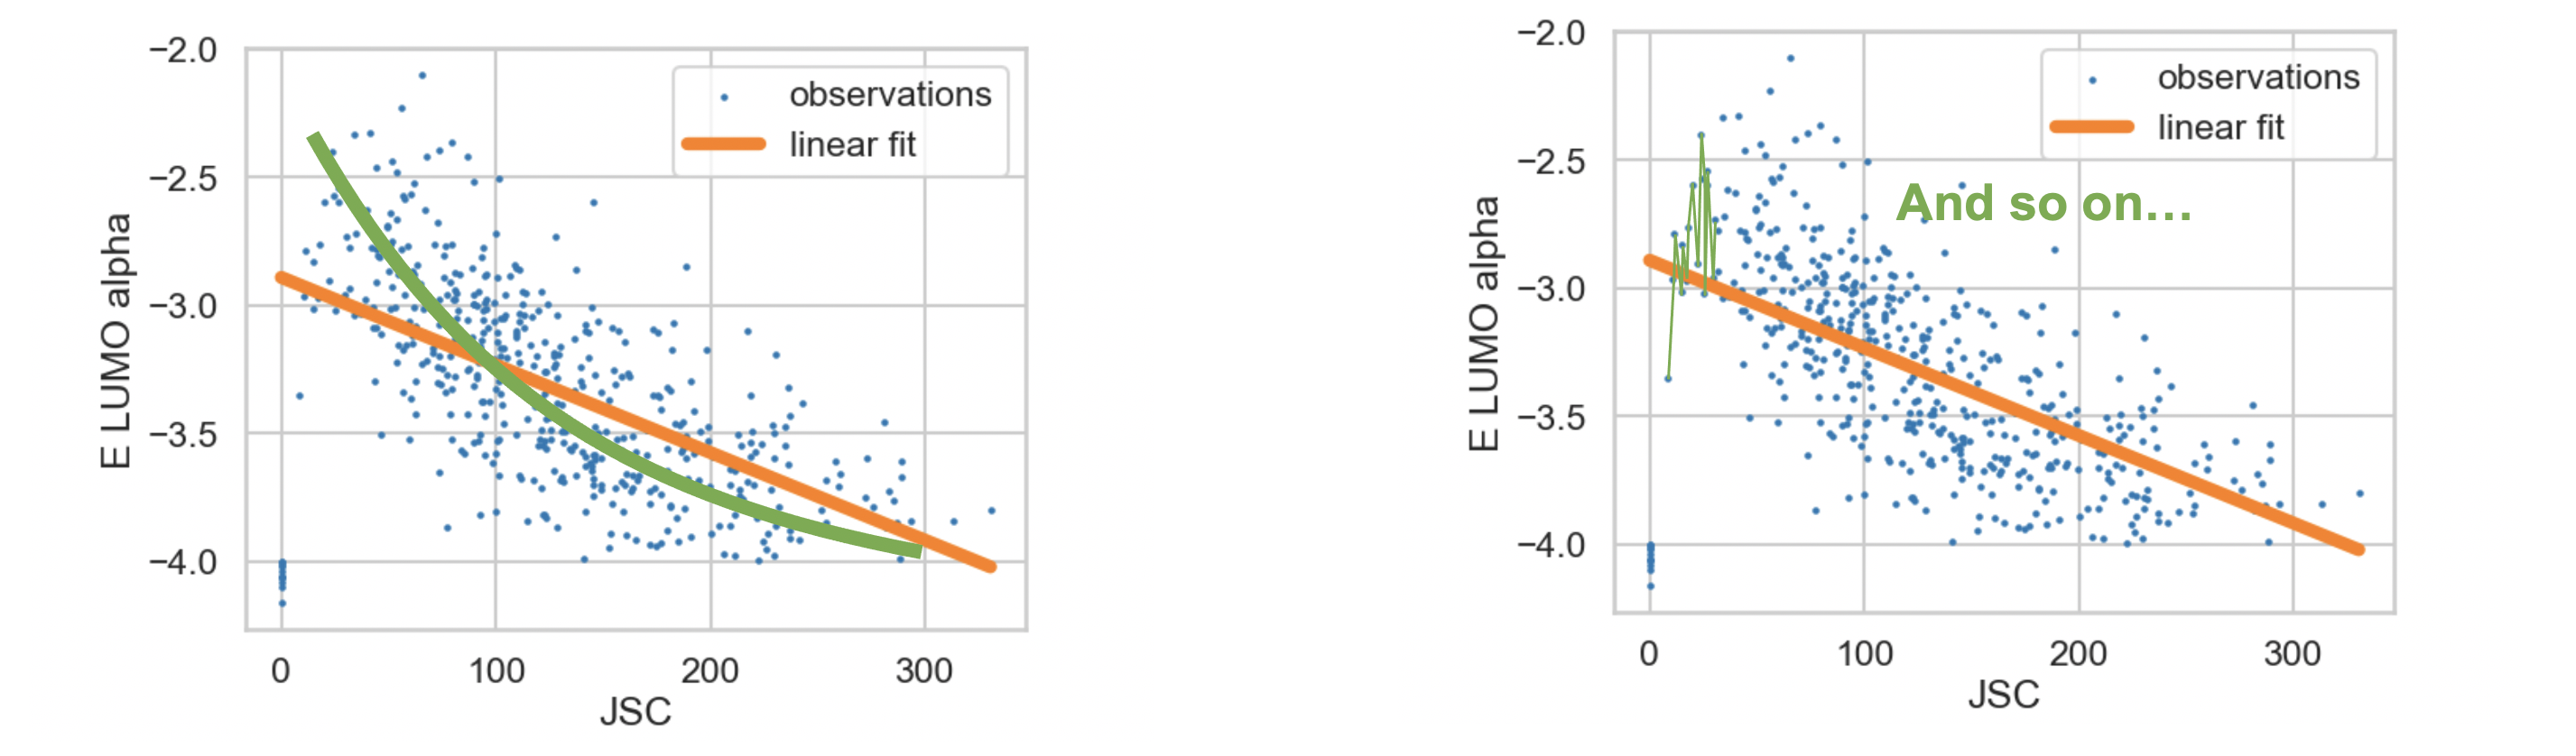

### A. _Poll_: Which model is better and why?

<font size=4> __Which model is better and why: the green on the left or right?__ Consider what we know about samples vs population.

***

### B. _Exercise_: effect of data samples on model

<font size=5><center> A fit model's parameters are dependant on the data it was trained on. __If the training data changes, so will the model parameters__ - some models are more susceptable than others.

In [8]:
data = df[['jsc', 'e_lumo_alpha']]
data.head()

jsc  e_lumo_alpha
1090677  178.167156     -3.648523
813514   131.886805     -3.488304
103256   283.150740     -3.722474
1652501  123.115198     -3.557159
1064161   29.308949     -2.956854

<font size=4> __Randomly split the data into 50% dev and 50% test 8 times.__ For each, train a linear regressor. Plot the lines for each linear regressor on the same plot. Additionally, compute the mean and standard deviation of model parameters ($w$ and $b$)

In [9]:
models = []
for i in range(8):
    dev, test = sklearn.model_selection.train_test_split(data, test_size=0.5, random_state=i)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(dev['jsc'].values.reshape(-1,1), dev['e_lumo_alpha'])
    models.append(model)

In [10]:
weights = [m.coef_[0] for m in models]
biases = [m.intercept_ for m in models]

In [11]:
print(f"Mean and standard deviation of weights: {np.mean(weights), np.std(weights)}")
print(f"Mean and standard deviation of biases: {np.mean(biases), np.std(biases)}")

Mean and standard deviation of weights: (-0.003372101767547573, 0.00020219102709738952)
Mean and standard deviation of biases: (-2.8928818263863674, 0.03772363979140129)


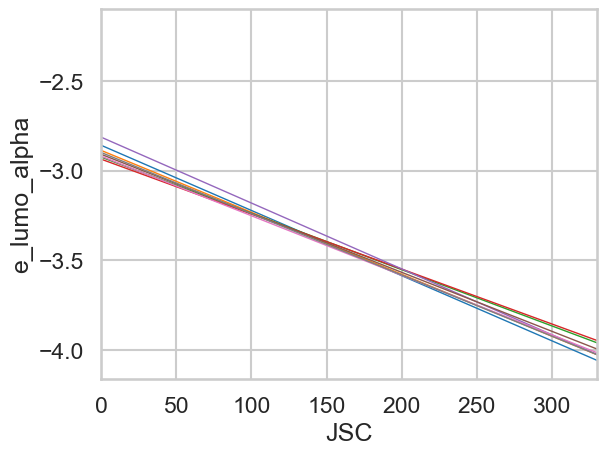

In [12]:
fig, ax = plt.subplots()
ax.set_ylim(data['e_lumo_alpha'].min(), data['e_lumo_alpha'].max())
ax.set_xlim(data['jsc'].min(), data['jsc'].max())
ax.set_xlabel('JSC')
ax.set_ylabel('e_lumo_alpha')

x = np.linspace(data['jsc'].min(), data['jsc'].max()).reshape(-1,1)

for m in models:
    ax.plot(x, m.predict(x), lw=1)

<font size=4> We can see that the model is dependant on the data - __luckily for the case of a linear regressor, they don't change much.__

<font size=5><center> This is what we call __*Variance*: the variability of a model's parameters dependant on data.__

***

### C. Estimating Variance

<font size=4> Note that __it is impossible to know the true variance because we don't have an infinite amount of data__. We can get an intuition on a model's variance by what we did above - the variation in the model due to the data. But the __size of the sample__ also effects the model performance. Here we investigate the model performance as a function of training data size:

In [13]:
def get_average_test_error_one_training_size(training_size: float = 1.0, replicates=20):
    test_mses = []
    train_mses = []
    
    # do some repetitions to be statistically sound
    for i in range(replicates):
        dev, test = sklearn.model_selection.train_test_split(data, test_size=0.5, random_state=i)
        
        # further sample the data down in size
        dev = dev.sample(frac=training_size)
        
        model = sklearn.linear_model.LinearRegression()
        model.fit(dev['jsc'].values.reshape(-1,1), dev['e_lumo_alpha'])
        
        # MSE
        test_mses.append(sklearn.metrics.mean_squared_error(test['e_lumo_alpha'], model.predict(test['jsc'].values.reshape(-1,1))))
        train_mses.append(sklearn.metrics.mean_squared_error(dev['e_lumo_alpha'], model.predict(dev['jsc'].values.reshape(-1,1))))
    return pd.DataFrame({'data_size': [len(dev)]*replicates, 'dev': train_mses, 'test': test_mses})

In [14]:
sizes_to_test = [ .1, .3, .5, .75, 1.0]

results = [get_average_test_error_one_training_size(s) for s in sizes_to_test]

In [15]:
results = pd.concat(results, ignore_index=True)

In [16]:
results.head()

data_size       dev      test
0         25  0.033213  0.107226
1         25  0.079440  0.118254
2         25  0.096046  0.124521
3         25  0.077391  0.104584
4         25  0.095607  0.113523

In [17]:
# "melt" the dataframe so that we can make a nice plot with seaborn
results = results.melt(id_vars=['data_size'], value_vars=['dev', 'test'], value_name='MSE', var_name='dataset')
results.head()

data_size dataset       MSE
0         25     dev  0.033213
1         25     dev  0.079440
2         25     dev  0.096046
3         25     dev  0.077391
4         25     dev  0.095607

<AxesSubplot:xlabel='data_size', ylabel='MSE'>

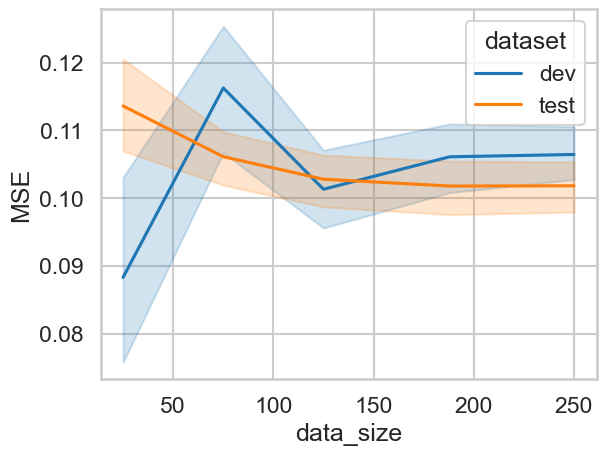

In [18]:
sns.lineplot(results, x='data_size', y='MSE', hue='dataset')

<font size=5><center> All models should decrease test error (on average) as training data size increases, however, __if a model never reaches test error close to the training error, or it takes a long time to do so, it has high variance.__ The linear model clearly has low variance. To actually quantify this, __we care about the gap__ between the test and dev error as dev size increases.

## 5. Bias

### A. Naive model

<font size=5><center> Consider the error on the training data if we were simply to guess the mean:

In [19]:
dev, test = sklearn.model_selection.train_test_split(data, test_size=0.5, random_state=i)
print(f'Naive model MSE: {((dev["e_lumo_alpha"] - dev["e_lumo_alpha"].mean())**2).mean()}')

Naive model MSE: 0.15762992086640967


<font size=5><center> We can consider this a __reasonable upper bound on training error.__ Something is fundamentally wrong if our training error is more than this, and __ideally we want error to be 0__.

In [20]:
linear_reg = sklearn.linear_model.LinearRegression()
linear_reg.fit(dev['jsc'].values.reshape(-1,1), dev['e_lumo_alpha'])   

LinearRegression()

In [21]:
print(f"A linear regressor has {sklearn.metrics.mean_squared_error(dev['e_lumo_alpha'], linear_reg.predict(dev['jsc'].values.reshape(-1,1)))} training MSE")

A linear regressor has 0.10909575133328864 training MSE


<font size=5><center> The linear model __does not have have zero training error__, in fact it is not that far off from the naive model error. __This is what we call a biased model: it cannot capture the data perfectly.__

### B. _Poll_: Unbiased estimator

<font size=4>If we create a model that perfectly fits its training data with no error, __how would you rate the reducable error__ (remember reducable error is an aspect of the population not just one sample!):

1. <font size=4> No reducible error, we did it.
2. <font size=4> Better reducible error than a linear model.
3. <font size=4> Worse reducible error than a linear model.
4. <font size=4> High redicuble error, might as well use the naive model.

<font size=4>Let's simply look at a __different__ dataset to test this. It is not the population, but we don't need it for this point. Here we approximate an unbiased estimator with a KNN with 1 neighbor.

In [22]:
knn = sklearn.neighbors.KNeighborsRegressor(n_neighbors=1)
knn.fit(dev['jsc'].values.reshape(-1,1), dev['e_lumo_alpha'])   

KNeighborsRegressor(n_neighbors=1)

In [23]:
print(f"A KNN has {sklearn.metrics.mean_squared_error(dev['e_lumo_alpha'], knn.predict(dev['jsc'].values.reshape(-1,1)))} training MSE")

A KNN has 0.04424761554847668 training MSE


<font size=4> It is very close to 0 (ubiased). Now let's look at the test set.

In [24]:
print(f'A naive model has {((test["e_lumo_alpha"] - dev["e_lumo_alpha"].mean())**2).mean()} test MSE')

A naive model has 0.1524856084868414 test MSE


In [25]:
print(f"A linear model has {sklearn.metrics.mean_squared_error(test['e_lumo_alpha'], linear_reg.predict(test['jsc'].values.reshape(-1,1)))} test MSE")

A linear model has 0.0979613576238502 test MSE


In [26]:
print(f"A KNN has {sklearn.metrics.mean_squared_error(test['e_lumo_alpha'], knn.predict(test['jsc'].values.reshape(-1,1)))} test MSE")

A KNN has 0.11298919042925222 test MSE


<font size=4> Creating an unbiased estimator worsens the test error. We can surmise that __an unbiased estimator trained on a sample will have larger population (reducible) error than a linear model__.

## 6. Bias Variance Tradeoff

<font size=5><center>__Reducible error is a function of both the model bias and its variance.__ To minimize the reducible error, we need to balance these to factors.

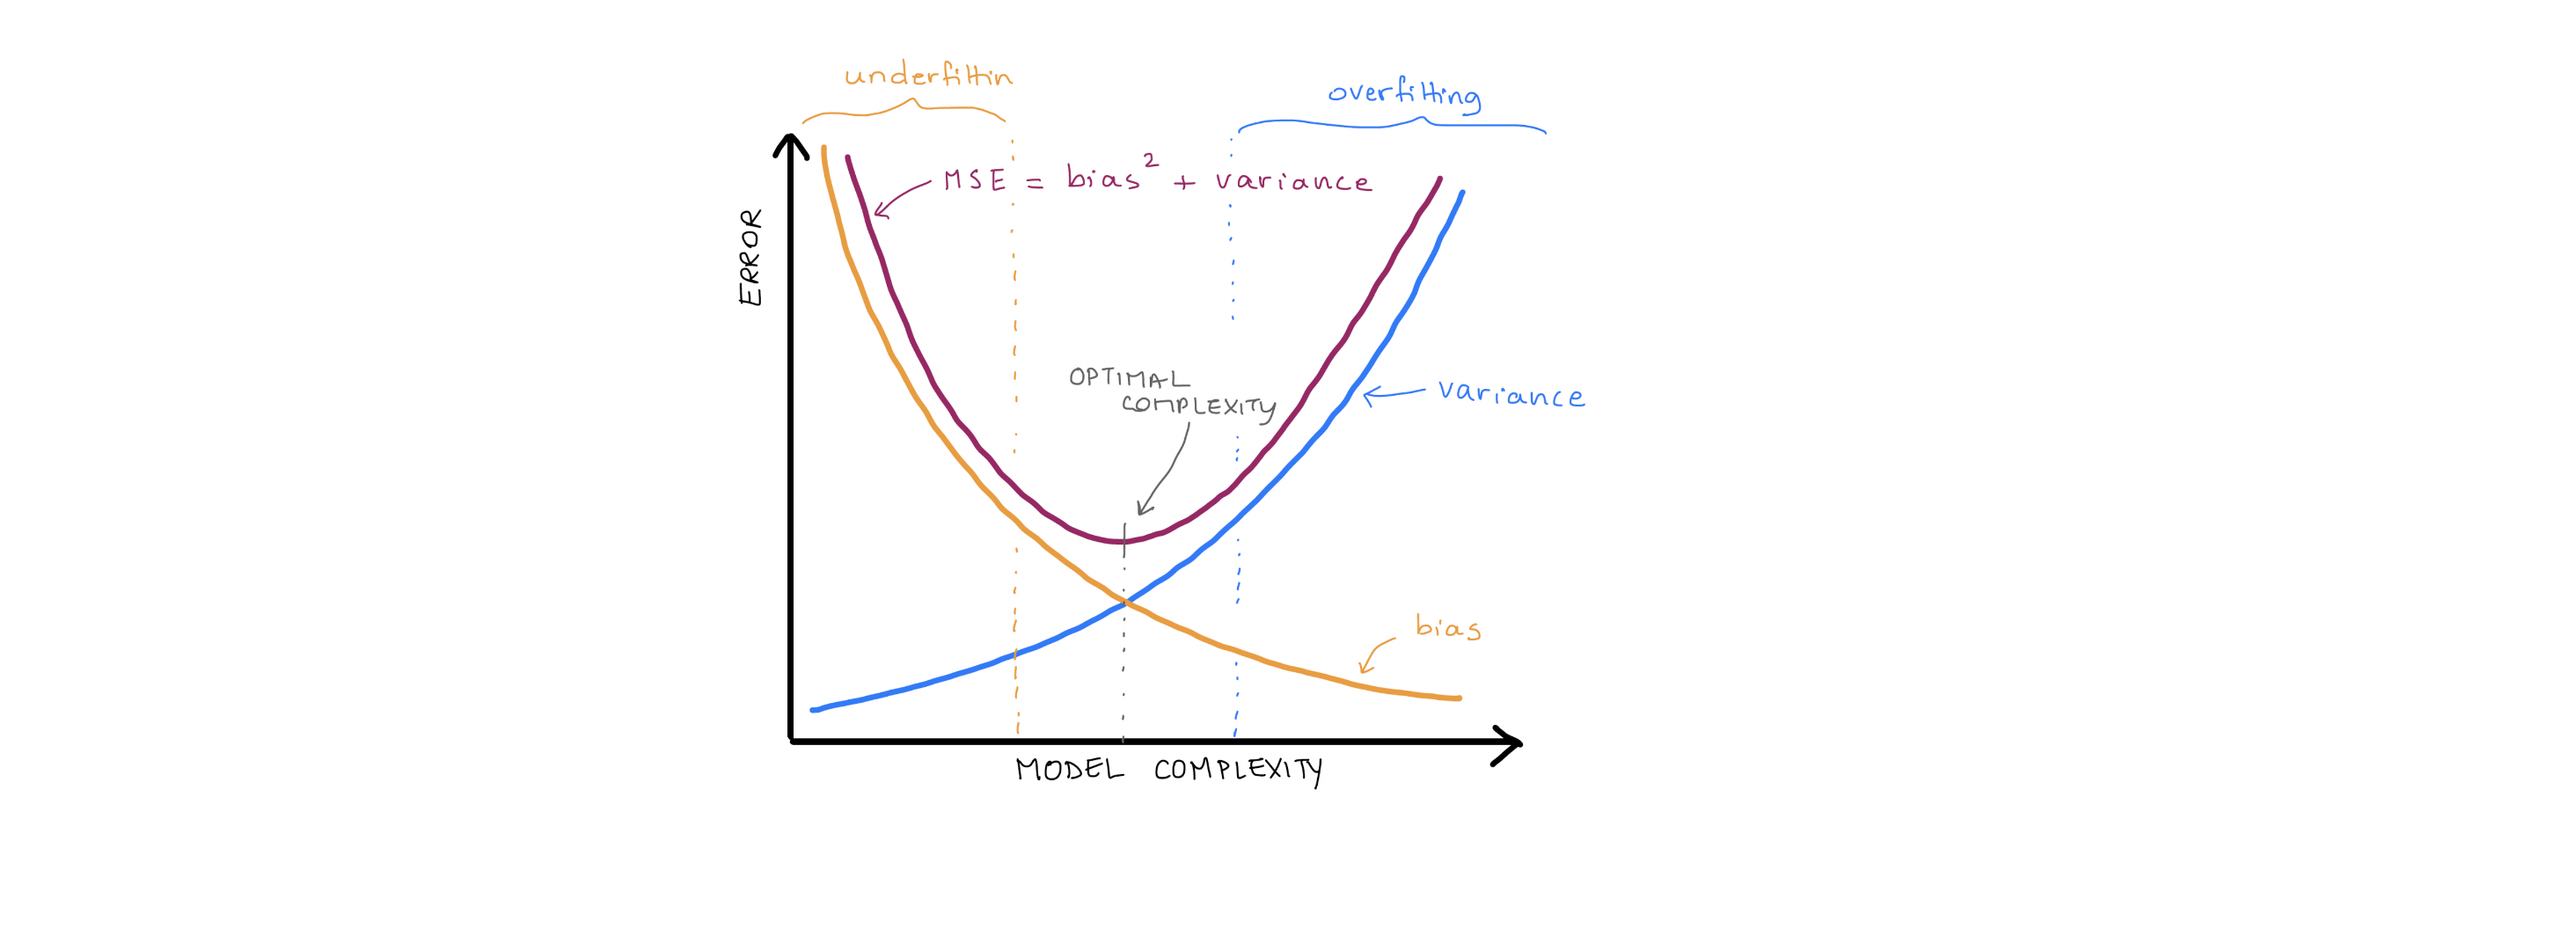

- <font size=4> __Overfitting__: Our model is picking noise ($\epsilon$) in the data, which is random, so will perform poorly on samples other than the training data. High variance.

- <font size=4> __Underfitting__: Our model is to simple to capture the true relationship between $y$ and $X$. It will perform about as well on a test set as the training set, but its not very good.

### A. _Exercise_: find the balance

<font size=4> Use the `dev` and `test` data that is already split:

In [27]:
dev_X = dev['jsc'].values.reshape(-1,1)
dev_y = dev['e_lumo_alpha'].values

test_X = test['jsc'].values.reshape(-1,1)
test_y = test['e_lumo_alpha'].values

<font size=4> We can create a polynomial estimator of the form $\hat{f}(x_0) = \Sigma_{j=0}^Pm_jx_0^j$ for degree $P$ with parameters $m_j$ in sklearn like so:

In [28]:
# multiply the one feature we have by itself and create a new matrix of values
poly_features = sklearn.preprocessing.PolynomialFeatures(degree=4)
dev_X_poly = poly_features.fit_transform(dev_X) # turns a column of x0 values into P + 1 columns eg. [1, x0, x0^2, ..., x0^P]
test_X_poly = poly_features.transform(test_X)

# take the polynomial values and fit the coefficients using a linear model
poly_model = sklearn.linear_model.LinearRegression()
poly_model.fit(dev_X_poly, dev_y)

LinearRegression()

<font size=4> Note that $P=0$ is equivalent to the naive model and $P=1$ is equivalent to a linear model.

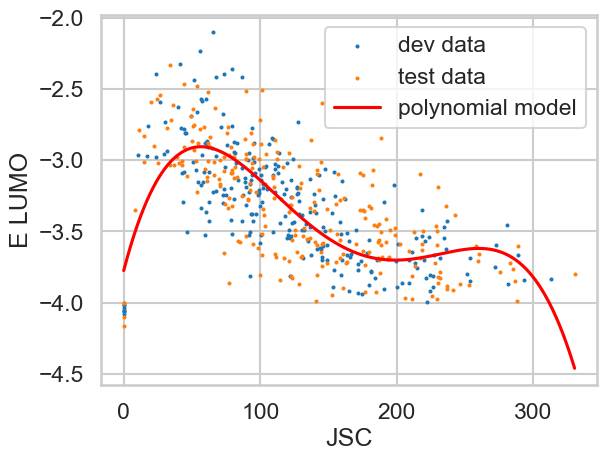

In [29]:
# make a plot to show the fit
fig, ax = plt.subplots()
ax.set_xlabel('JSC')
ax.set_ylabel('E LUMO')

ax.scatter(dev_X, dev_y, s=2, label='dev data')
ax.scatter(test_X, test_y, s=2, label='test data')

# plot the fit
x = np.linspace(data['jsc'].min(), data['jsc'].max(), 1000).reshape(-1,1)
ax.plot(x, poly_model.predict(poly_features.transform(x)), c='r', label='polynomial model')
ax.legend()

<font size=4> __Train polynomial models of degrees `0 to 20`__. __Create a dataframe__ and a plot if time allows, __that shows the effect of the model complexity (degree) and the training a test error__.

In [30]:
def do_one_polynomial(degree=0):
    # do some repetitions to be statistically sound
    poly_features = sklearn.preprocessing.PolynomialFeatures(degree=degree)
    dev_X_poly = poly_features.fit_transform(dev_X)
    test_X_poly = poly_features.transform(test_X)

    # take the polynomial values and fit the coefficients using a linear model
    poly_model = sklearn.linear_model.LinearRegression()
    poly_model.fit(dev_X_poly, dev_y)

    # MSE
    train_mse = sklearn.metrics.mean_squared_error(test_y, poly_model.predict(test_X_poly))
    test_mse = sklearn.metrics.mean_squared_error(dev_y, poly_model.predict(dev_X_poly))
    return {'degree': degree, 'train mse': train_mse, 'test mse': test_mse}

In [31]:
results = []

for degree in range(20):
    results.append(do_one_polynomial(degree=degree))

In [32]:
results = pd.DataFrame(results)
results

degree  train mse  test mse
0        0   0.152486  0.157630
1        1   0.097961  0.109096
2        2   0.099733  0.107194
3        3   0.100123  0.083476
4        4   0.086501  0.068584
5        5   0.077768  0.066281
6        6   0.079417  0.063558
7        7   0.096925  0.077240
8        8   0.108012  0.087057
9        9   0.110832  0.091288
10      10   0.097150  0.092797
11      11   0.120500  0.092794
12      12   0.225139  0.093571
13      13   0.527153  0.095342
14      14   1.257256  0.098097
15      15   2.803825  0.101686
16      16   5.675612  0.105840
17      17  10.378119  0.110201
18      18  17.361148  0.114405
19      19  27.232138  0.118189

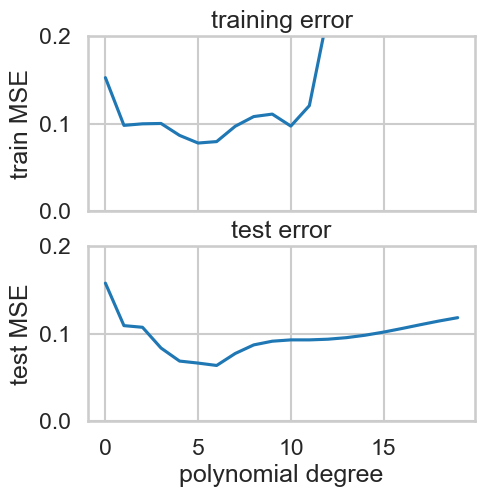

In [33]:
fig, axes = plt.subplots(2,1, figsize=(5,5), sharex=True)
axes[0].set_ylabel('train MSE')
axes[0].set_title('training error')
axes[0].set_ylim(0,.2)
axes[1].set_ylabel('test MSE')
axes[1].set_xlabel('polynomial degree')
axes[1].set_title('test error')
axes[1].set_ylim(0,.2)

# plot training and testing data
axes[0].plot(results['degree'], results['train mse'])
axes[1].plot(results['degree'], results['test mse'])

<font size=4> Observations:

- <font size=4> __We can reduce the model bias from the linear model__ using polynomial degrees 4, 5, 6 as seen in the training error plot. This reduces the reducible error as seen in the test plot.
    
- <font size=4> The model variance increases as we increase the polynomial degree passed 7, and this __increases__ the reducible error, as seen in the testing error plot.
    
- <font size=4> __The model becomes unstable at large degrees__ (seen by the training error going above the naive model error). This is unique to the poly model.


***

## 7. Multiple linear regression

### A. A linear regression with two features

<font size=5><center>What we learned about a linear model with one x variable can be easily extended to any number of feature. __The parameters are still analytically solvable.__

<font size=5>$$\hat{f}(x_0,x_1,...,x_M)=b+\Sigma_{j=0}^Mw_jx_j$$

<font size=4>The vector of weights is determined with matrix math analagous to the $w$ in simple linear regression. Here $X$ is the matrix of training data of shape (number of examples, number of features), and $Y$ is the column vector of example labels:

<font size=4>$$W=\begin{bmatrix}
           w_{0} \\
           w_{1} \\
           \vdots \\
           w_{m}
         \end{bmatrix} = (X^TX)^{-1}X^TY$$

<font size=4>__$X^TX$ Is called the covariance matrix.__ The goal of this class is not to be able to reproduce the math behind MLR, nor have we reviewed matrix math/linear algebra. If you would like a refresher on that type of math and a derivation of the analytical MLR models, see [this resource.](https://bookdown.org/ripberjt/qrmbook/introduction-to-multiple-regression.html)

***

<font size=4> Let's get another feature involved: `e_homo_alpha`. Now we have a "Multiple linear Regression" in two dimensions:

In [34]:
data = df[['jsc', 'e_homo_alpha', 'e_lumo_alpha']]
dev, test = sklearn.model_selection.train_test_split(data, test_size=0.5, random_state=0)
dev_X = dev[['jsc', 'e_homo_alpha']].values
dev_y = dev['e_lumo_alpha'].values
test_X = test[['jsc', 'e_homo_alpha']].values
test_y = test['e_lumo_alpha'].values

In [35]:
print(f"Shape of X, y data for the dev set: ", dev_X.shape, dev_y.shape)
print(f"Shape of X, y data for the test set: ", test_X.shape, test_y.shape)

Shape of X, y data for the dev set:  (250, 2) (250,)
Shape of X, y data for the test set:  (250, 2) (250,)


<font size=4> It is not necessary to noramlize for linear regression but it is a unique case. __Let's do it for propriety__. Since they are both continuous, unbounded values I will standardize instead of MinMax scale but it wouldn't be a terrible choice.

In [36]:
standardizer = sklearn.preprocessing.StandardScaler()
dev_X = standardizer.fit_transform(dev_X)
test_X = standardizer.transform(test_X)

In [37]:
model = sklearn.linear_model.LinearRegression()
model.fit(dev_X, dev_y)

LinearRegression()

In [38]:
test_mse = sklearn.metrics.mean_squared_error(test_y, model.predict(test_X))
train_mse = sklearn.metrics.mean_squared_error(dev_y, model.predict(dev_X))

In [39]:
print(f'MLR model has training and testing MSE of {train_mse}, {test_mse}')

MLR model has training and testing MSE of 0.026334791924938882, 0.04640469154307787


<font size=4> Look at that! The introduction of a new feature gave the model enough information to make a __nearly unbiased estimator (from 0.1 down to 0.03)__, and the __test set error is almost as good as the training error__, indicated that is is not overfit!

### B. Parity plot

<font size=4> A plot that we very commonly use to analyze regression tasks is a "parity" or "prediction" plot__, which compares true values to predicted values:

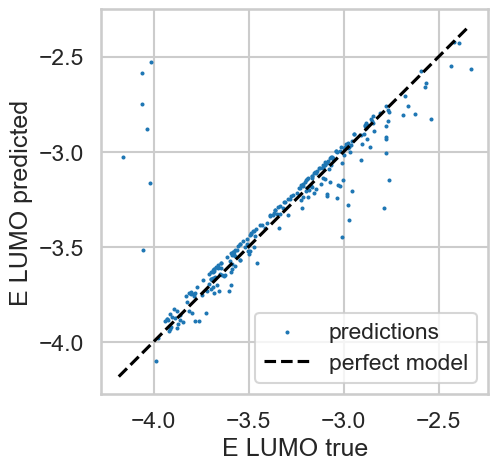

In [40]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')

predictions = model.predict(test_X)
ax.scatter(test_y, predictions, label='predictions', s=2)
lims=ax.get_ylim() # get min and max to make a line
ax.plot(lims, lims, c='k', ls='--', label='perfect model')

ax.set_xlabel('E LUMO true')
ax.set_ylabel('E LUMO predicted')
ax.legend()

<font size=4>__A perfect model has predicted values always exatly equal to true values__, eg. along the x=y line in the above plot. This rarely happens, instead there is some distribution around this line, the difference from the line is the absolute error of the model for the data point.

***

## 8. Model Regularization

### A. _Poll_: How to combat high variance?


<font size=4>For your dataset you have found that changing the training data dramatically changes the parameters of your model. What is the effect of this on the reducible error, what would you do in this case? Given your course of action, are there any risks or side effects of the quality of your model?

***

<font size=4>Consider the following dummy data, where we know the true function in two dimensions:

<font size=4>$$f(x0,x1) = 0.8x_0-0.2x_1+1.2$$

<font size=4>$$y = f(x0,x1)+\epsilon$$

In [41]:
def f(x0,x1):
    return .8*x0-.2*x1+1.2

def y(x0,x1):
    return f(x0,x1) + np.random.normal(scale=.02, size=x0.shape)

In [42]:
x0, x1 = np.random.normal(size=(2,200))
ys = y(x0,x1)

In [43]:
data=pd.DataFrame({'x0': x0, 'x1': x1, 'y': ys})

<AxesSubplot:title={'center':'y vs x1'}, xlabel='x1', ylabel='y'>

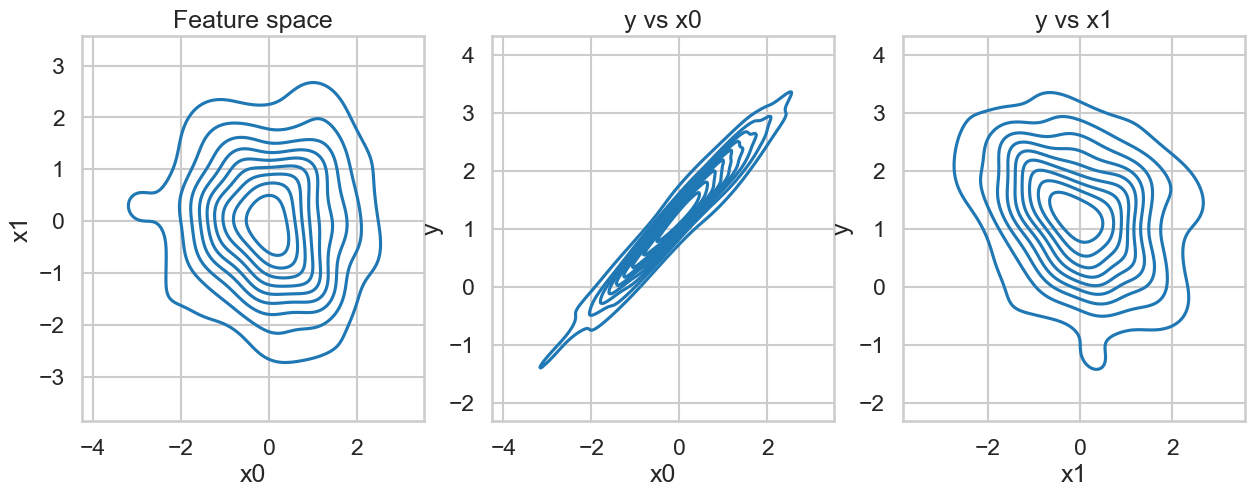

In [44]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
axes[0].set_xlabel('x0')
axes[0].set_ylabel('x1')
axes[0].set_title('Feature space')
sns.kdeplot(x=data['x0'], y=data['x1'], ax=axes[0])

axes[1].set_xlabel('x0')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x0')
sns.kdeplot(x=data['x0'], y=data['y'], ax=axes[1])

axes[2].set_xlabel('x1')
axes[2].set_ylabel('y')
axes[2].set_title('y vs x1')
sns.kdeplot(x=data['x1'], y=data['y'], ax=axes[2])


<font size=5><center>__There is a much stronger relationship of $y$ to $x_0$ than $x_1$.__ If you were to fit a simple linear regressor to each feature, the difference between the line and the data (error) is the effect on y not captured by that single feature (the effect of the other feature as well as the unknown effect $\epsilon$):

In [45]:
def true_fx0(x0):
    return 0.8*x0+1.2
def true_fx1(x1):
    return -0.2*x1+1.2

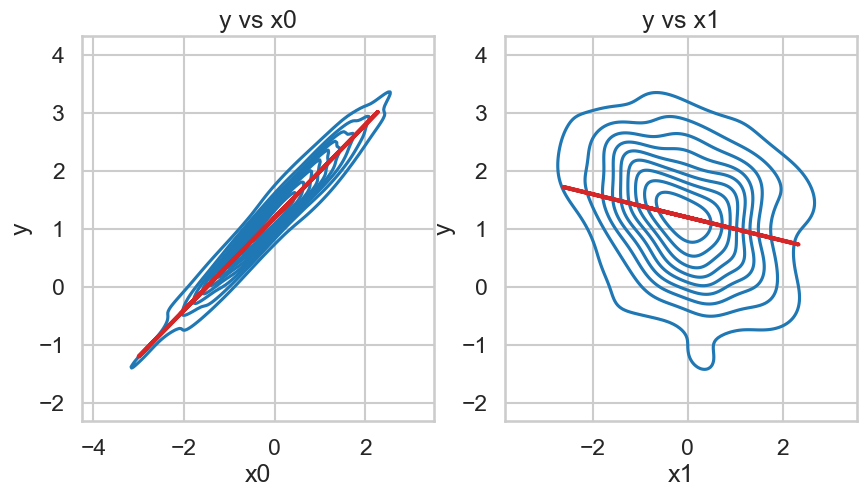

In [49]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
sns.kdeplot(x=data['x0'], y=data['y'], ax=axes[0])
axes[0].plot(data['x0'], true_fx0(data['x0']), c='tab:red', lw=3)

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
sns.kdeplot(x=data['x1'], y=data['y'], ax=axes[1])
axes[1].plot(data['x1'], true_fx1(data['x1']), c='tab:red', lw=3)

***

### B. _Poll_: Is the effect of sampling different for each feature?

<font size=4>We saw in simple linear regression that the line of best fit is dependant on the sample of data, this is variance in a nutshell. Will the variance effect be less, the same, or greater for $x1$ compared to $x0?$

***

<font size=4>Here we use a small sample size of 10 to exaserbate the effect.

In [47]:
## x0 first
models_x0 = []
for i in range(8):
    data_sample = data.sample(n=10)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(data_sample['x0'].values.reshape(-1,1), data_sample['y'])
    models_x0.append(model)
    
## x1 first
models_x1 = []
for i in range(8):
    data_sample = data.sample(n=10)
    
    model = sklearn.linear_model.LinearRegression()
    model.fit(data_sample['x1'].values.reshape(-1,1), data_sample['y'])
    models_x1.append(model)

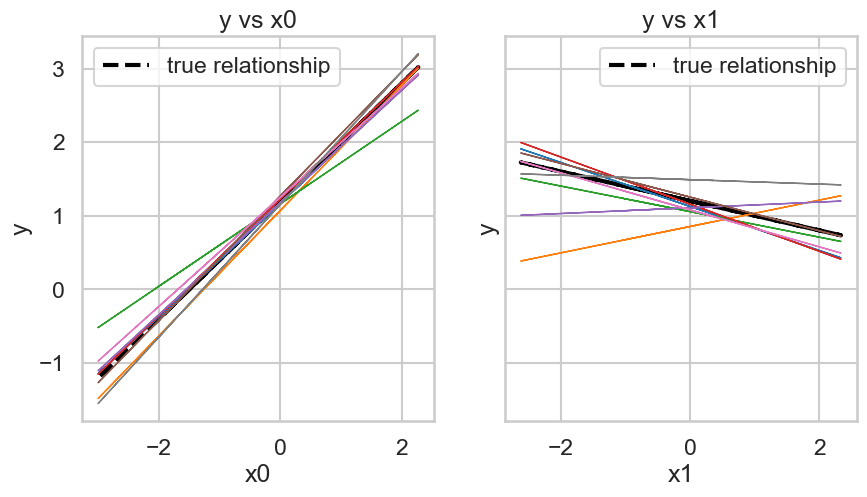

In [48]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
axes[0].plot(data['x0'], true_fx0(data['x0']), c='k', ls='--', lw=3, label='true relationship')
for m in models_x0:
    axes[0].plot(data['x0'], m.predict(data['x0'].values.reshape(-1,1)), lw=1)
axes[0].legend()

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
axes[1].plot(data['x1'], true_fx1(data['x1']), c='k', ls='--', lw=3, label='true relationship')
for m in models_x1:
    axes[1].plot(data['x1'], m.predict(data['x1'].values.reshape(-1,1)), lw=1)
axes[1].legend()

<font size=5><center>__What we see is a consequence of the true relationship of $x1$ and $y$ being a similar order of magnitude to the noise.__ Should $x_1$ be "trusted" as much as $x_0$ when fitting the model?

***

### C. Penalize large slopes

<font size=4>__If a linear model has a very high magnitude weight, it can be because of one of two reasons:__

    

<font size=4> 1. The true relationship is strong.

<font size=4> 2. The variance is high, leading to a weight that is very differnt from the true weight.

<font size=5><center>Model __regularization combats high variance by penalizing large relationships__, e.g. it is "cautious" and would rather assume no relationship (naive model). By doing this we help ensure that a model weight will only be high if it truly reduces the error significantly.

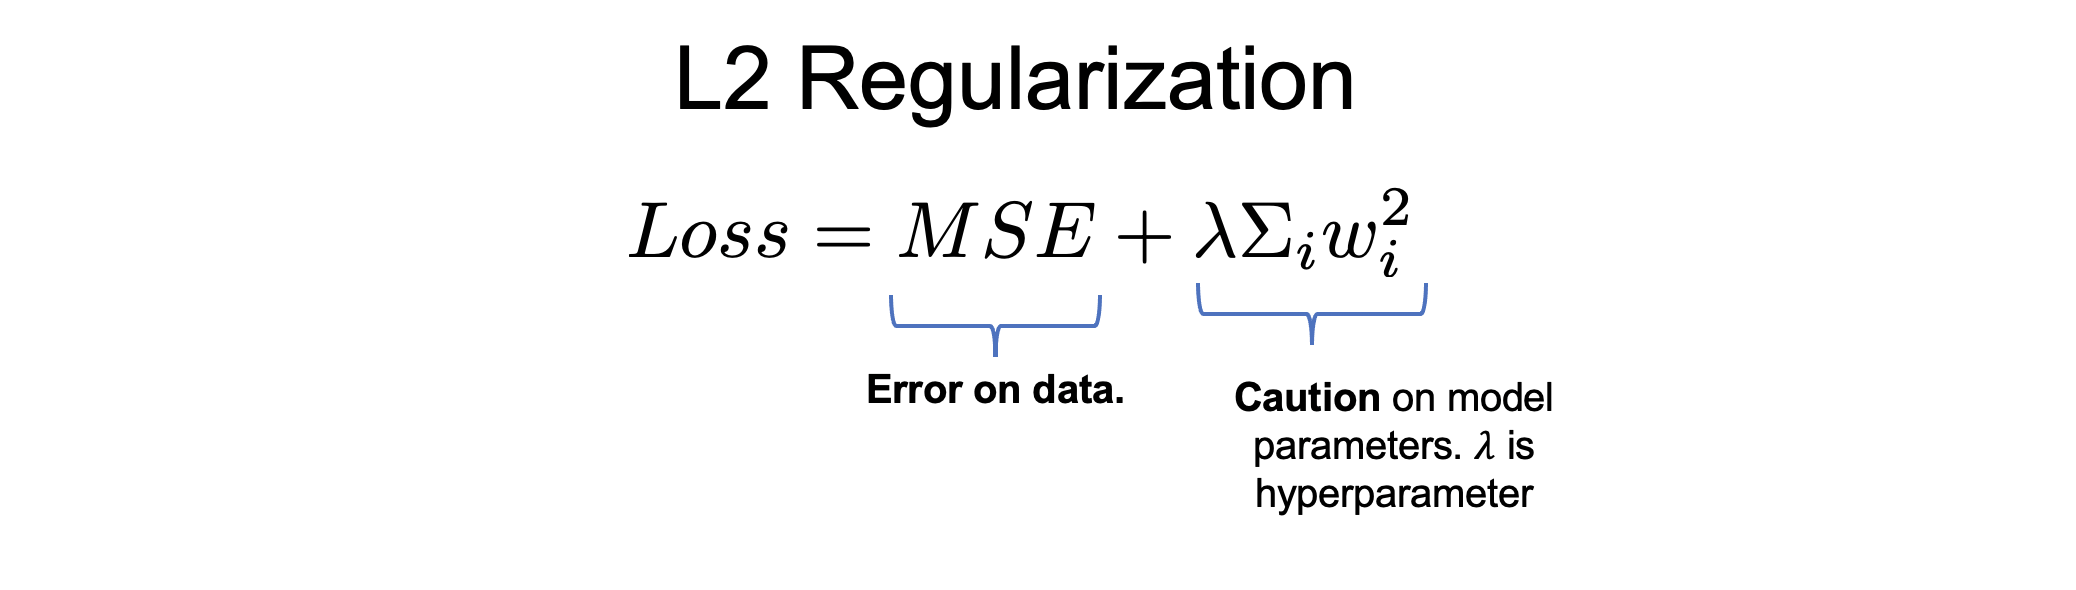

<font size=5><center>But won't this reduce the true relationship in addition to the noise? __Yes, but parameters with higher variance are effected to a greater extent.__ Consider our toy data, and say we are overly cautious and regularize to the point of using a naive model.

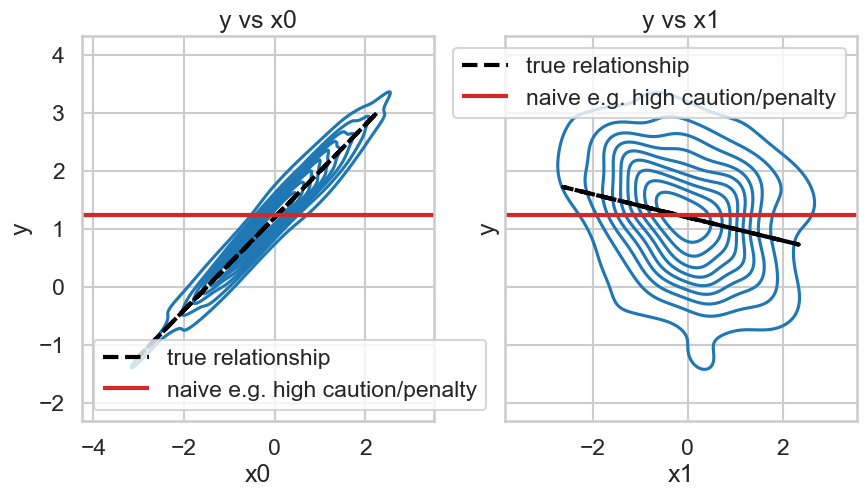

In [51]:
fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True)
axes[0].set_xlabel('x0')
axes[0].set_ylabel('y')
axes[0].set_title('y vs x0')
sns.kdeplot(x=data['x0'], y=data['y'], ax=axes[0])
axes[0].plot(data['x0'], true_fx0(data['x0']), c='k', ls='--', lw=3, label='true relationship')
axes[0].hlines(data['y'].mean(), *axes[0].get_xlim(), color='tab:red', lw=3, label='naive e.g. high caution/penalty')
axes[0].legend()

axes[1].set_xlabel('x1')
axes[1].set_ylabel('y')
axes[1].set_title('y vs x1')
sns.kdeplot(x=data['x1'], y=data['y'], ax=axes[1])
axes[1].plot(data['x1'], true_fx1(data['x1']), c='k', ls='--', lw=3, label='true relationship')
axes[1].hlines(data['y'].mean(), *axes[1].get_xlim(), color='tab:red', lw=3, label='naive e.g. high caution/penalty')
axes[1].legend()

<font size=5><center>The MSE in the left case is much greater, which increases the loss. __Since we are minimizing the loss, a combination of error and caution__ the parameters that minimize the loss will only have large values when the relationship is high, and not when random noise effects the data heavily.

<font size=5><center>__This helps prevent overfitting! (the case on the right)__

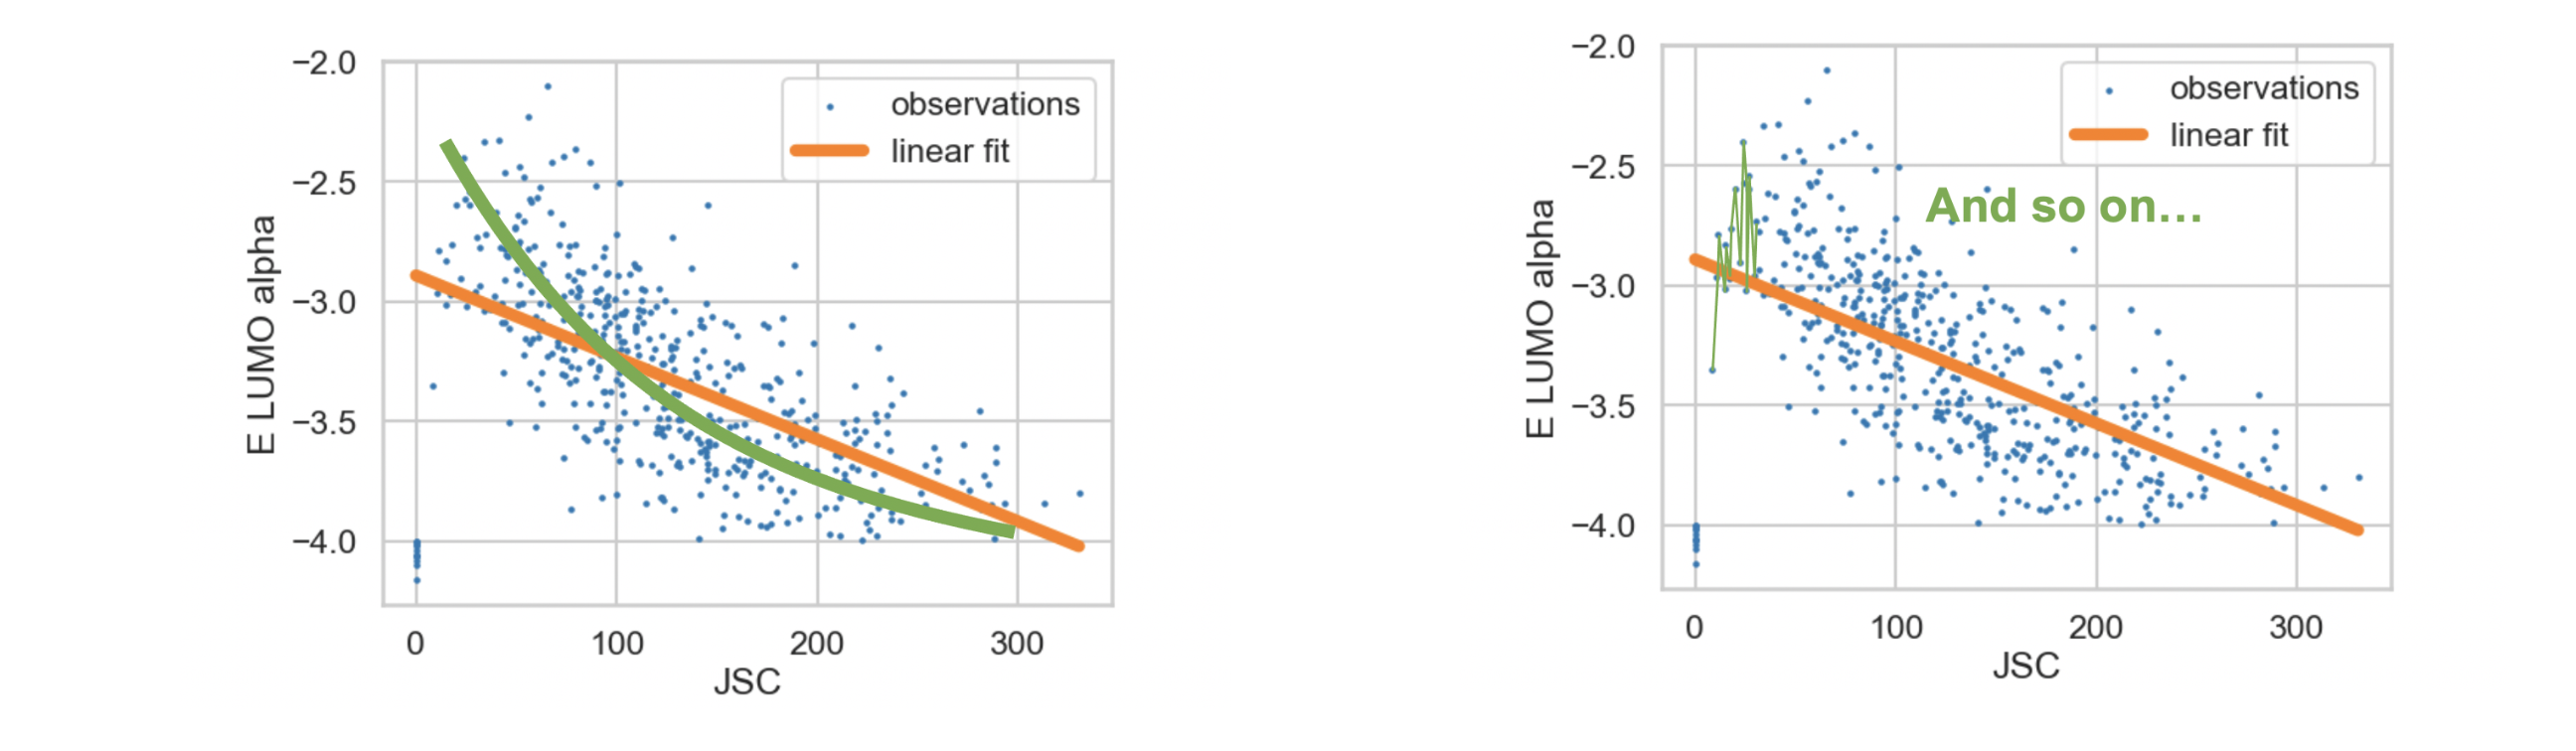

### D. _Exercise_: compare the variance of a ridge regressor

<font size=4>The `Ridge` in sklearn is a linear model that implements L2 regularization. For each of 10 samples of 10 data points from the training data, fit a Linear regressor and a ridge regressor to predict `E LUMO` given `jsc` and `voc`, and track the test errors. Compute the standard deviation and mean of test error and comment on the variance of the two strategies.

In [50]:
data = df[['voc', 'e_lumo_alpha', 'jsc']]

In [51]:
train, test = sklearn.model_selection.train_test_split(data, test_size=.2, random_state=1)

In [52]:
## x0 first
mlr_error = []
l2_error = []
for i in range(8):
    data_sample = train.sample(n=10, random_state=i)
    
    # linear model
    mlr = sklearn.linear_model.LinearRegression()
    mlr.fit(data_sample[['voc', 'jsc']].values, data_sample['e_lumo_alpha'])
    mlr_error.append(sklearn.metrics.mean_squared_error(test['e_lumo_alpha'], mlr.predict(test[['voc', 'jsc']])))
    
    # L2 model
    l2 = sklearn.linear_model.Ridge(alpha=1)
    l2.fit(data_sample[['voc', 'jsc']].values, data_sample['e_lumo_alpha'])
    l2_error.append(sklearn.metrics.mean_squared_error(test['e_lumo_alpha'], l2.predict(test[['voc', 'jsc']])))

In [55]:
np.array(mlr_error).mean()

0.11187762842176154

In [53]:
np.array(mlr_error).std()

0.06092635844483717

In [56]:
np.array(l2_error).mean()

0.10173040665875793

In [54]:
np.array(l2_error).std()

0.05038363283401726

<font size=5><center>The ridge regressor (L2 Regularization) prevents the model from being overfit due to the susceptability of regular linear regressors to variance when the data size is small.

## Summary

<font size=4> - We broke down our estimators error into __reducible and irreducible error which are both functions of the population. We wish to minimize reducable error__, but we only have a sample of data.
    
<font size=4> - We introduced a __linear regressor and its parameters__ (weight and bias) which is a very simple model (line) with analytical parameters. We fit this to some data.
    
<font size=4> - We discussed a __model's tendency to change with respect to the training data - models that change a lot have high variance__ and are susceptible to overfitting.
    
<font size=4> - We discussed a models bias, with is related to its complexity. __Models that are too simple will not be able to capture the true relationship and have bias.__
    
<font size=4> - We discussed the __bias variance tradeoff__, we need to find the sweet spot in order to minimize reducable error.
    
<font size=4> - We extended linear regression to multiple features (Multiple linear regression)
    
<font size=4> - We briefly mentioned some __different metrics to use for classification and regression__, and also mentioned how one might make a continuous output into a nominal prediction.
    
<font size=4> - We discussed __regularization, where we can try to combat overfitting__ without reducing model complexity.